# Facade Safety and Violation Analysis


# Data Cleaning

In this part we will import and clean all our datasets and make final merged datasets for violation outcome which will show safe(0) and unsafe(1) stats of buildings with all the independent variables listed.  
 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read Facade datasets

In [2]:
path = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"

dff = pd.read_csv(path+'Facades_Universe.csv')

#drop Nan Vlaues
print("Before dropping Nan, len is",len(dff))
#dff = dff.dropna()
dff = dff.dropna(subset = ['Bin']).reset_index(drop=True)

dff = dff.reset_index(drop = True)
print("After droppng Nan, len is", len(dff))

#Convert BINs ,CB & Number Of Stories to int64
dff['Bin'] = dff['Bin'].astype(np.int64)
dff['CB Number'] = dff['CB Number'].astype(str)
dff['CB Number'] = dff['CB Number'].str.split(".").str[0]

#dff['Number Of Stories'] = dff['Number Of Stories'].astype(np.int64)
dff = dff.reset_index(drop= True)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
#dff.tail()

dff = dff[dff["Bin"] != 1000000]
dff = dff[dff["Bin"] != 1813361]
dff = dff[dff["Bin"] != 1813359]
dff = dff[dff["Bin"] != 1813360]
dff = dff[dff["Bin"] != 1813248]


dff = dff.drop_duplicates(['Bin']).reset_index(drop=True)

dff = dff.sort_values('Bin').reset_index(drop=True)

dff

print("After dropping duplicates, len is ",len(dff))


Before dropping Nan, len is 16182
After droppng Nan, len is 16156
After dropping duplicates, len is  14658


In [3]:
dff["Borough"] = dff["Borough"].map(str.strip)
dff["Bin"] = dff["Bin"].astype(str)
dff.reset_index(drop=True)
dff.dtypes

Bin                    object
Block                   int64
Lot                     int64
Borough                object
Exterior Wall Types    object
CB Number              object
Number Of Stories      object
dtype: object

## Add Boro Code to Facades Datasets

In [4]:
#creating  new column Boro Code based on each borough's unique number

#creating blank series
Boro_Code = pd.Series([])

#looping over each value.
for i in range(len(dff)):
    if dff["Borough"][i] == "MANHATTAN":
        Boro_Code[i] = "1"
    elif dff["Borough"][i] == "BRONX":
        Boro_Code[i] = "2"
    elif dff["Borough"][i] == "BROOKLYN":
        Boro_Code[i] = "3"
    elif dff["Borough"][i] == "QUEENS":
        Boro_Code[i] = "4"
    else:
        Boro_Code[i] = "5"

# inserting new column with values of list made above         
dff.insert(7, "Boro Code", Boro_Code)

#list output
dff.head()


    

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code
0,1000005,4,7501,MANHATTAN,STEEL,101,50,1
1,1000006,5,7501,MANHATTAN,ALUMINIUM,101,40,1
2,1000007,5,10,MANHATTAN,NaN,101,22,1
3,1000016,8,44,MANHATTAN,LIMESTONE STEEL,101,17,1
4,1000018,9,1,MANHATTAN,CURTAIN WALL,101,34,1


## Create BBL

In [5]:
pd.set_option('chained_assignment', None)
# Convert Block and Lot to String.Borough has alreday been done. 
dff["Block"] = dff["Block"].astype(str)
dff["Lot"] = dff["Lot"].astype(str)

#Strip white space from leading and trailing edge
dff["Block"] = dff["Block"].map(str.strip)
dff["Lot"] = dff["Lot"].map(str.strip)

dff['Block'] = dff['Block'].str.split(".").str[0]
dff['Lot'] = dff['Lot'].str.split(".").str[0]


#Create BBL

# Add 0s to block, maximux 5 digit. 
for i in range(0,len(dff)):
    if len(dff["Block"][i]) == 1:
        dff["Block"][i] = "0000" + dff["Block"][i]
    if len(dff["Block"][i]) == 2:
        dff["Block"][i] = "000" + dff["Block"][i]
    if len(dff["Block"][i]) == 3:
        dff["Block"][i] = "00" + dff["Block"][i]
    if len(dff["Block"][i]) == 4:
        dff["Block"][i] = "0" + dff["Block"][i]
        

# Add 0s to Lot, maximum 4 digit.
    if len(dff["Lot"][i]) == 1:
        dff["Lot"][i] = "000" + dff["Lot"][i]
    if len(dff["Lot"][i]) == 2:
        dff["Lot"][i] = "00" + dff["Lot"][i]
    if len(dff["Lot"][i]) == 3:
        dff["Lot"][i] = "0" + dff["Lot"][i]
        
    
dff["BBL"] = dff["Boro Code"] + dff["Block"] + dff["Lot"]
#BBL = str(BBL)
#BBL

bblList = dff["BBL"].tolist()
bblSet = set(bblList)


In [6]:
dff.dtypes

Bin                    object
Block                  object
Lot                    object
Borough                object
Exterior Wall Types    object
CB Number              object
Number Of Stories      object
Boro Code              object
BBL                    object
dtype: object

## Read Pluto BIN Datasets

In [7]:
#dfp  = pd.read_csv('Downloads/Pluto_BIN.csv')
#path = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\"

df_pluto  = pd.read_csv(path + 'pluto_18v2.csv', low_memory=False)

#Choosing specific columns for our work. 
dfpl = df_pluto[["borough","block","lot","cd","address","bldgclass","bldgfront","bldgarea","lotfront","numfloors","ownername","yearbuilt","histdist","proxcode","bbl"]]
#Sorting by bbl gives arrange borough by their code. 
dfpl = dfpl.sort_values('bbl').reset_index(drop=True)
#Rename Columns
dfpl = dfpl.rename(columns={'borough':'Borough', 'block': 'Block','lot':'Lot','cd':'Community District','address':'Address','bldgclass':'Building Class',
                           'bldgfront':'Building Front','bldgarea':'Building Area','lotfront':'Lot Front','numfloors':'Num of Floors',
                           'ownername':'Owner Name','yearbuilt':'Year Built','histdist':'Historical','proxcode':'Proximity Code',
                           'bbl':'BBL'})
                          
dfpl.head()


,Borough,Block,Lot,Community District,Address,Building Class,Building Front,Building Area,Lot Front,Num of Floors,Owner Name,Year Built,Historical,Proximity Code,BBL
0,MN,1,10,101.0,1 GOVERNORS ISLAND,Y4,0.0,2725731.0,177.61,0.0,GOVERNORS ISLAND CORP,1900.0,Governors Island Historic District,0.0,1000010010
1,MN,1,101,101.0,1 LIBERTY ISLAND,P7,0.0,541886.0,500.00,0.0,U S GOVT LAND & BLDGS,1900.0,NaN,0.0,1000010101
2,MN,1,201,101.0,1 ELLIS ISLAND,Z9,0.0,603130.0,63.45,0.0,U S GOVT LAND & BLDGS,1900.0,Ellis Island Historic District,0.0,1000010201
3,MN,1,301,101.0,JOE DIMAGGIO HIGHWAY,U0,0.0,0.0,0.00,0.0,,0.0,NaN,0.0,1000010301
4,MN,1,401,101.0,JOE DIMAGGIO HIGHWAY,U0,0.0,0.0,0.00,0.0,,0.0,NaN,0.0,1000010401


In [8]:
dfpl.dtypes

Borough                object
Block                   int64
Lot                     int64
Community District    float64
Address                object
Building Class         object
Building Front        float64
Building Area         float64
Lot Front             float64
Num of Floors         float64
Owner Name             object
Year Built            float64
Historical             object
Proximity Code        float64
BBL                     int64
dtype: object

In [9]:
dfpl["Block"] =dfpl["Block"].astype(str)
dfpl["Lot"] =dfpl["Lot"].astype(str)
dfpl["Community District"] =dfpl["Community District"].astype(str)
dfpl["Num of Floors"] =dfpl["Num of Floors"].astype(str)
dfpl["Year Built"] =dfpl["Year Built"].astype(str)
dfpl["BBL"] =dfpl["BBL"].astype(str)


dfpl["Block"] =dfpl["Block"].map(str.strip)
dfpl["Lot"] =dfpl["Lot"].map(str.strip)
dfpl["Community District"] =dfpl["Community District"].map(str.strip)
dfpl["Num of Floors"] =dfpl["Num of Floors"].map(str.strip)
dfpl["Year Built"] =dfpl["Year Built"].map(str.strip)
dfpl["BBL"] =dfpl["BBL"].map(str.strip)

dfpl.dtypes


Borough                object
Block                  object
Lot                    object
Community District     object
Address                object
Building Class         object
Building Front        float64
Building Area         float64
Lot Front             float64
Num of Floors          object
Owner Name             object
Year Built             object
Historical             object
Proximity Code        float64
BBL                    object
dtype: object

## Drop Columns

In [10]:
dfpl = dfpl.drop(columns=['Borough','Block','Lot'])
dfpl.reset_index(drop= True)
dfpl.tail()


,Community District,Address,Building Class,Building Front,Building Area,Lot Front,Num of Floors,Owner Name,Year Built,Historical,Proximity Code,BBL
858971,503.0,142 BENTLEY STREET,A1,30.0,1624.0,60.00,2.5,"DEROSA, DENISE",1925.0,NaN,1.0,5080500083
858972,503.0,146 BENTLEY STREET,A1,32.0,2057.0,62.00,2.5,"ARLOTTA, THOMAS",1915.0,NaN,1.0,5080500086
858973,503.0,150 BENTLEY STREET,A1,24.0,1728.0,53.00,2.0,JOHN GERVASI,1915.0,NaN,1.0,5080500089
858974,503.0,156 BENTLEY STREET,A1,32.0,1408.0,52.14,2.0,WILLIAM P MOOG,1950.0,NaN,1.0,5080500092
858975,503.0,162 BENTLEY STREET,A1,30.0,1768.0,50.00,2.0,EDWARD DONOHUE,1945.0,NaN,1.0,5080500094


In [11]:
#We need to drop 0s from Year & CD after decimal. 
dfpl["Year Built"] =dfpl["Year Built"].astype(str).replace('\.0', '', regex=True)
dfpl["Community District"] =dfpl["Community District"].astype(str).replace('\.0', '', regex=True)
dfpl.head()

,Community District,Address,Building Class,Building Front,Building Area,Lot Front,Num of Floors,Owner Name,Year Built,Historical,Proximity Code,BBL
0,101,1 GOVERNORS ISLAND,Y4,0.0,2725731.0,177.61,0.0,GOVERNORS ISLAND CORP,1900,Governors Island Historic District,0.0,1000010010
1,101,1 LIBERTY ISLAND,P7,0.0,541886.0,500.00,0.0,U S GOVT LAND & BLDGS,1900,NaN,0.0,1000010101
2,101,1 ELLIS ISLAND,Z9,0.0,603130.0,63.45,0.0,U S GOVT LAND & BLDGS,1900,Ellis Island Historic District,0.0,1000010201
3,101,JOE DIMAGGIO HIGHWAY,U0,0.0,0.0,0.00,0.0,,0,NaN,0.0,1000010301
4,101,JOE DIMAGGIO HIGHWAY,U0,0.0,0.0,0.00,0.0,,0,NaN,0.0,1000010401


## Merge Facade and Pluto Datasets

In [12]:
all_buildings = pd.merge(dff[['Bin','BBL','Exterior Wall Types','Number Of Stories']], dfpl, how='left', on=['BBL'])

In [13]:
all_buildings= all_buildings.drop(columns=['Num of Floors'])
all_buildings.head()

,Bin,BBL,Exterior Wall Types,Number Of Stories,Community District,Address,Building Class,Building Front,Building Area,Lot Front,Owner Name,Year Built,Historical,Proximity Code
0,1000005,1000047501,STEEL,50,101,1 WATER STREET,RC,308.0,2542563.0,341.99,ONE NY PLAZA CO LLC,1969,NaN,0.0
1,1000006,1000057501,ALUMINIUM,40,101,125 BROAD STREET,RB,0.0,1354691.0,197.87,125 BROAD CONDOMINIUM,1970,NaN,3.0
2,1000007,1000050010,NaN,22,101,115 BROAD STREET,O4,148.0,1016406.0,167.12,4 NYP VENTURES LLC,1969,NaN,2.0
3,1000016,1000080044,LIMESTONE STEEL,17,101,102 BROAD STREET,U4,0.0,0.0,111.42,VERIZON NEW YORK INC,0,NaN,0.0
4,1000018,1000090001,CURTAIN WALL,34,101,34 WHITEHALL STREET,O4,180.0,692431.0,211.33,"ONE STATE STREET, LLC",1970,NaN,1.0


In [14]:
#len(merge_all)

In [15]:
#Owner Name sorted as a list. 
all_buildings["Owner Name"] = all_buildings["Owner Name"].astype(str)

ownerList = sorted(list(set(all_buildings["Owner Name"].tolist() ) ) )

print ("number of owners", len(ownerList) )

ownerList

number of owners 9392


[' ',
 '1 BEACH 105 ASSOCIATE',
 '1 CHRISTOPHER REALTY,',
 '1 EAST 66TH STREET CO',
 '1 LEX AVE CP',
 '1 WEST 124TH STREET C',
 '1 WEST 3RD STREET COR',
 '1 WEST LLC',
 '1-10 BUSH TERMINAL OW',
 '1-29 BOGARDUS PLACE,',
 '10 12 EAST 23RD ST IN',
 '10 BLEECKER ST OWNERS',
 '10 E 18TH ST CONDOMIN',
 '10 EAST 38TH STREET C',
 '10 EAST 43RD STREET L',
 '10 EAST 70TH STREET I',
 '10 EAST END AVE OWNER',
 '10 STANTON OWNERS LLC',
 '10 STRATFORD ASS',
 '10 W 18TH OWNER LLC',
 '10 WEST 47TH OWNER LL',
 '10 WEST 57TH STREET R',
 '10 WEST 65 OWNER LLC',
 '10 WEST 66TH STREET C',
 '10 WEST 93 STREET H D',
 '10-12 COOPER SQUARE I',
 '10-26 SOUTH WILLIAM S',
 '10-46 JACKSON AVENUE',
 '100 BANK ST OWNERS CO',
 '100 BENNETT OWNERS C',
 '100 CHURCH FEE OWNER',
 '100 EIGHTH LLC',
 '100 JANE STREET L P C',
 '100 LAFAYETTE,',
 '100 PARK TERRACE WEST',
 '100 REALTY EQUITIES',
 '100 REMSEN STREET LLC',
 '100 RIVERSIDE CORP',
 '100 ST NICHOLAS AVENU',
 '100 UNITED NATIONS PL',
 '100 WALL INVESTMENTS',
 '100 

## Count owners

In [16]:
dfo = all_buildings.copy()



dfo["Owner Name"] = dfo["Owner Name"].astype(str).map(str.strip)

dfo["Count"] = 1

dfo = dfo[["Owner Name", "Count"]]


dfo = dfo.groupby(['Owner Name']).sum()
dfo = dfo.add_suffix('').reset_index()


dfo

,Owner Name,Count
0,,1231
1,1 BEACH 105 ASSOCIATE,1
2,"1 CHRISTOPHER REALTY,",1
3,1 EAST 66TH STREET CO,1
4,1 LEX AVE CP,1
5,1 WEST 124TH STREET C,1
6,1 WEST 3RD STREET COR,1
7,1 WEST LLC,1
8,1-10 BUSH TERMINAL OW,1
9,"1-29 BOGARDUS PLACE,",1


In [17]:
dfo["Owner Name"][0]

''

In [18]:
dfo = dfo.sort_values(by = 'Count', ascending=False).reset_index(drop=True)

dfo = dfo[dfo["Owner Name"] != "nan"]

path = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\"

dfo.to_csv(path + "test.csv", index=False)

In [19]:
path

'C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\'

## Here we will import all the datasets related to violation and Match the bins with our Facade dataset.

## Read Compliance Dataset

In [20]:
path =  "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
comp = pd.read_csv(path+'Facades - DOB NOW cycle report(2).csv')
comp2 = comp[["Bin", "CN Filing status","TR6 QEWI FirstName","TR6 QEWI Last Name"]]

comp2 = comp2.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)

COMP = pd.Series([])

#looping over each value.
for i in range(len(comp)):
    if comp2["CN Filing status"][i] == "SAFE":
        COMP[i] = 0
    elif comp2["CN Filing status"][i] == "SWARMP":
        COMP[i] = 0
    elif comp2["CN Filing status"][i] == "No Report Filed":
        COMP[i] = 0
    else:
        COMP[i] = 1

# inserting new column with values of list made above         
comp2.insert(2, "COMP", COMP)

#list output
comp2.head()





,Bin,CN Filing status,COMP,TR6 QEWI FirstName,TR6 QEWI Last Name
0,1000000,SAFE,0,NaN,NaN
1,1000000,SWARMP,0,NaN,NaN
2,1000000,SAFE,0,PAUL,VALERIO
3,1000000,SAFE,0,ROY,SOKOLOSKI
4,1000000,No Report Filed,0,NaN,NaN


In [21]:
#GROUPBY
comp2_t = comp2.copy()
comp2_t = comp2_t.groupby(['Bin']).sum()

comp2_t = comp2_t.add_suffix('').reset_index()

comp2_t = comp2_t.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)

#comp2_t['Bin'].value_counts()
comp2_t["Bin"] = comp2_t["Bin"].astype(str)

comp2_tDic = comp2_t.set_index('Bin')['COMP'].to_dict()

comp2_tDic



{'1000000': 0,
 '1000005': 0,
 '1000006': 0,
 '1000007': 0,
 '1000016': 1,
 '1000018': 0,
 '1000020': 0,
 '1000021': 0,
 '1000023': 0,
 '1000024': 0,
 '1000025': 0,
 '1000027': 0,
 '1000029': 0,
 '1000038': 0,
 '1000043': 0,
 '1000044': 0,
 '1000045': 0,
 '1000047': 0,
 '1000053': 0,
 '1000055': 0,
 '1000057': 0,
 '1000058': 0,
 '1000059': 0,
 '1000060': 0,
 '1000061': 0,
 '1000301': 0,
 '1000436': 0,
 '1000544': 0,
 '1000792': 0,
 '1000793': 1,
 '1000794': 0,
 '1000798': 0,
 '1000802': 0,
 '1000803': 0,
 '1000804': 0,
 '1000807': 0,
 '1000808': 0,
 '1000809': 0,
 '1000810': 0,
 '1000811': 0,
 '1000812': 0,
 '1000813': 0,
 '1000814': 0,
 '1000815': 0,
 '1000816': 0,
 '1000817': 0,
 '1000818': 0,
 '1000819': 0,
 '1000820': 0,
 '1000821': 0,
 '1000823': 0,
 '1000824': 0,
 '1000825': 0,
 '1000826': 0,
 '1000827': 0,
 '1000828': 0,
 '1000829': 0,
 '1000830': 0,
 '1000831': 0,
 '1000832': 0,
 '1000833': 0,
 '1000835': 0,
 '1000842': 0,
 '1000849': 0,
 '1000850': 0,
 '1000851': 0,
 '1000854'

In [22]:
#add the comp outcome columns to facade dataets 
dff["Bin"] = dff["Bin"].astype(str)
dff["COMP"] = dff["Bin"].map(comp2_tDic)
dff["QEWI NAME"] = comp2["TR6 QEWI FirstName"]+" "+ comp2["TR6 QEWI Last Name"]

In [23]:
dff.head()

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0.0,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0.0,NaN
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0.0,PAUL VALERIO
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1.0,ROY SOKOLOSKI
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0.0,NaN


In [24]:
print("len:",len(dff))
print("NaNs:",dff["COMP"].isnull().sum())
print("Total Outcome:",len(dff)-dff["COMP"].isnull().sum())

len: 14658
NaNs: 1713
Total Outcome: 12945


In [25]:
#Check if the bin has 0 or 1 from complinace datasets dict. 
comp2_tDic['1000016']

1

## ECB Violation Dataset

In [26]:
path = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
df_vios = pd.read_csv( path +'Failure to maintain Exterior Wall from Jan 2016.csv')
df_vios


,ECB Vio#,BIN-Occurrence,House# Occurrence,Street Occurrence,Boro-Occurrence,Block-Occurrence,Lot-Occurrence,Com Bd-Occurrence,Vio Issued Date,Vio Severity,Section of Law,Vio Standard Description,Vio Inspector Description,City-owned?,Vio Issued Date.1
0,34563425X,3238956.0,3415,FILLMORE AVENUE,BROOKLYN,8478.0,5.0,318.0,5/22/2009,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL AND OR ...,NaN,5/22/2009 0:00
1,34680500J,2009610.0,4173,3 AVENUE,BRONX,2924.0,37.0,206.0,7/7/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL HAZARDO...,NaN,7/7/2008 0:00
2,34680501L,2009610.0,4173,3 AVENUE,BRONX,2924.0,37.0,206.0,7/10/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTEERIOR BUILDING WALL. H...,NaN,7/10/2008 0:00
3,34680535J,2000554.0,344,EAST 134 STREET,BRONX,2296.0,9.0,201.0,9/17/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN. PARTIAL COLLAPSE OF EAST ...,NaN,9/17/2008 0:00
4,34680567Y,2001214.0,512,EAST 163 STREET,BRONX,2367.0,18.0,203.0,7/31/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG WALLS. DEFECT NOTED: ...,NaN,7/31/2008 0:00
5,34680604Y,5001156.0,58,CLEVELAND STREET,STATEN ISLAND,50.0,71.0,501.0,7/2/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL'S (1) R...,NaN,7/2/2008 0:00
6,34680605X,5112031.0,281,SOUTH AVENUE,STATEN ISLAND,1261.0,66.0,501.0,7/2/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,"FAILURE TO MAINTAIN EXTERIOR BLDG WALLS, DEFEC...",NaN,7/2/2008 0:00
7,34680684N,5001439.0,16,VAN BUREN STREET,STATEN ISLAND,61.0,11.0,501.0,7/7/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG WALLS OR APPURENTANCE...,NaN,7/7/2008 0:00
8,34680805K,5026500.0,72,BOWLES AVENUE,STATEN ISLAND,1148.0,61.0,501.0,7/15/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG OR APPURTENANCES IN A...,NaN,7/15/2008 0:00
9,34680812Z,5021998.0,11,DUNCAN STREET,STATEN ISLAND,848.0,335.0,502.0,7/15/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG & APPURTANENCES DEFEC...,NaN,7/15/2008 0:00


In [27]:
df_vios.dtypes

ECB Vio#                      object
BIN-Occurrence               float64
House# Occurrence             object
Street Occurrence             object
Boro-Occurrence               object
Block-Occurrence             float64
Lot-Occurrence               float64
Com Bd-Occurrence            float64
Vio Issued Date               object
Vio Severity                  object
Section of Law                object
Vio Standard Description      object
Vio Inspector Description     object
City-owned?                   object
Vio Issued Date.1             object
dtype: object

## Finding out Violation for Facades with key words

In [28]:
#prac = df_vios[df_vios['Vio Inspector Description'].str.contains("LOOSE")]
pd.set_option('chained_assignment', None)
df_vios["ECB"] = 0

flist = ["LOOSE", "WALL HAZARDOUS", "CRACK","COLLAPSE","LOOSE BRICK","FALL","DANGER","APPURT","WALL DEFECT","PARAPET"]

for i in range(0, len(df_vios)):
    #if "LOOSE" in df_vios["Vio Inspector Description"][i]:
        #print (df_vios["Vio Inspector Description"][i] )
    for f in flist:
        if f in df_vios["Vio Inspector Description"][i]:
            df_vios["ECB"][i] = 1
    


In [29]:
#Finding word that falls both in safe and unsafe Category. Separting them by listing the keyword.  

word =["PULLING AWAY","DEFECTIVE"]


for i in range(0, len(df_vios)):
    if "STUCCO" in df_vios["Vio Inspector Description"][i]:
        for j in range(0, len(word)):
            if word[j] in df_vios["Vio Inspector Description"][i]:
                df_vios["ECB"][i] = 1
            
find = ["DEFECT","FELL","EXPOSE","PULLING AWAY","SEPARTE","DISREPAIR","CORNICE","SPALLING","SEPARATING"]       

for i in range(0, len(df_vios)):
    if "MASONRY"and "MASONARY" in df_vios["Vio Inspector Description"][i]:
        for j in range(0, len(find)):
            if find[j] in df_vios["Vio Inspector Description"][i]:
                    df_vios["ECB"][i] = 1
                    
look =["BALCONY","WINDOW","GLASS","WORK W/O A PERMIT"]
for i in range(0, len(df_vios)):
    if "FACADE" in df_vios["Vio Inspector Description"][i]:
        for j in range(0, len(look)):
            if look[j] in df_vios["Vio Inspector Description"][i]:
                       df_vios["ECB"][i] = 0
            else:
                  df_vios["ECB"][i] = 1

lookup =["EXPOSURE","MASONARY","PUBLIC","DISLOGED","BRICKWALL"]
for i in range(0, len(df_vios)):
    if "FELL" in df_vios["Vio Inspector Description"][i]:
        for j in range(0, len(lookup)):
            if lookup[j] in df_vios["Vio Inspector Description"][i]:
                  df_vios["ECB"][i] = 1
        


In [30]:
df_vios

,ECB Vio#,BIN-Occurrence,House# Occurrence,Street Occurrence,Boro-Occurrence,Block-Occurrence,Lot-Occurrence,Com Bd-Occurrence,Vio Issued Date,Vio Severity,Section of Law,Vio Standard Description,Vio Inspector Description,City-owned?,Vio Issued Date.1,ECB
0,34563425X,3238956.0,3415,FILLMORE AVENUE,BROOKLYN,8478.0,5.0,318.0,5/22/2009,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL AND OR ...,NaN,5/22/2009 0:00,1
1,34680500J,2009610.0,4173,3 AVENUE,BRONX,2924.0,37.0,206.0,7/7/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL HAZARDO...,NaN,7/7/2008 0:00,1
2,34680501L,2009610.0,4173,3 AVENUE,BRONX,2924.0,37.0,206.0,7/10/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTEERIOR BUILDING WALL. H...,NaN,7/10/2008 0:00,1
3,34680535J,2000554.0,344,EAST 134 STREET,BRONX,2296.0,9.0,201.0,9/17/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN. PARTIAL COLLAPSE OF EAST ...,NaN,9/17/2008 0:00,1
4,34680567Y,2001214.0,512,EAST 163 STREET,BRONX,2367.0,18.0,203.0,7/31/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG WALLS. DEFECT NOTED: ...,NaN,7/31/2008 0:00,1
5,34680604Y,5001156.0,58,CLEVELAND STREET,STATEN ISLAND,50.0,71.0,501.0,7/2/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN EXTERIOR BLDG WALL'S (1) R...,NaN,7/2/2008 0:00,1
6,34680605X,5112031.0,281,SOUTH AVENUE,STATEN ISLAND,1261.0,66.0,501.0,7/2/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,"FAILURE TO MAINTAIN EXTERIOR BLDG WALLS, DEFEC...",NaN,7/2/2008 0:00,1
7,34680684N,5001439.0,16,VAN BUREN STREET,STATEN ISLAND,61.0,11.0,501.0,7/7/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG WALLS OR APPURENTANCE...,NaN,7/7/2008 0:00,1
8,34680805K,5026500.0,72,BOWLES AVENUE,STATEN ISLAND,1148.0,61.0,501.0,7/15/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG OR APPURTENANCES IN A...,NaN,7/15/2008 0:00,1
9,34680812Z,5021998.0,11,DUNCAN STREET,STATEN ISLAND,848.0,335.0,502.0,7/15/2008,CLASS - 1,AC 28-302.1,FAILURE TO MAINTAIN BUILDING WALL(S) OR APPURT...,FAILURE TO MAINTAIN BLDG & APPURTANENCES DEFEC...,NaN,7/15/2008 0:00,1


In [31]:
df_vios= df_vios.rename(columns={'BIN-Occurrence':'Bin'})
df_vios['Bin']= df_vios['Bin'].astype(str).map(str.strip)
df_vios["Bin"] = df_vios["Bin"].replace('\.0', '', regex=True)

In [32]:
### Do groupby on Bins and count total violation and make a dictionary
df_vios2 = df_vios[['Bin','ECB']]
df_vios2= df_vios2.groupby(['Bin']).sum()

df_vios2 = df_vios2.add_suffix('').reset_index()

df_vios2= df_vios2.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)


df_vios2["Bin"] =df_vios2["Bin"].astype(str)

df_vios2Dic = df_vios2.set_index('Bin')['ECB'].to_dict()

df_vios2Dic

{'1000000': 0,
 '1000012': 1,
 '1000030': 1,
 '1000041': 1,
 '1000793': 0,
 '1000825': 0,
 '1000835': 1,
 '1000846': 2,
 '1000862': 3,
 '1000883': 2,
 '1001038': 1,
 '1001040': 1,
 '1001046': 5,
 '1001047': 1,
 '1001054': 2,
 '1001060': 1,
 '1001077': 1,
 '1001103': 2,
 '1001143': 1,
 '1001165': 1,
 '1001187': 0,
 '1001190': 1,
 '1001226': 1,
 '1001241': 1,
 '1001249': 1,
 '1001268': 1,
 '1001270': 1,
 '1001274': 1,
 '1001279': 1,
 '1001280': 1,
 '1001324': 1,
 '1001325': 1,
 '1001330': 2,
 '1001331': 1,
 '1001333': 2,
 '1001362': 1,
 '1001379': 1,
 '1001380': 1,
 '1001406': 1,
 '1001467': 1,
 '1001470': 1,
 '1001473': 1,
 '1001497': 1,
 '1001550': 1,
 '1001551': 1,
 '1001589': 1,
 '1001623': 1,
 '1001624': 1,
 '1001625': 1,
 '1001626': 4,
 '1001627': 4,
 '1001631': 1,
 '1001636': 1,
 '1001641': 5,
 '1001649': 1,
 '1001673': 1,
 '1001712': 2,
 '1001713': 2,
 '1001724': 1,
 '1001790': 1,
 '1001815': 1,
 '1001841': 0,
 '1001863': 1,
 '1001864': 1,
 '1001894': 5,
 '1001909': 1,
 '1001928'

In [33]:
#add the ECB  outcome Column to facade dataset.
dff["ECB"]= dff["Bin"].map(df_vios2Dic)

In [34]:
dff.head()

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0.0,NaN,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0.0,NaN,NaN
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0.0,PAUL VALERIO,NaN
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1.0,ROY SOKOLOSKI,NaN
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0.0,NaN,NaN


In [35]:
print("len:",len(dff))
print("NaNs:",dff["ECB"].isnull().sum())
print("Total Outcome:",len(dff)-dff["ECB"].isnull().sum())

len: 14658
NaNs: 13991
Total Outcome: 667


In [36]:
#doing the intersection and finding the matching bins. 
set(dff["Bin"]) & set(df_vios["Bin"])
match = set(df_vios["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))

matching bins: 667


In [37]:
#Check
df_vios2Dic['5109580']

1

In [38]:
path =  "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\"
#df_vios[df_vios['Status']==1].to_csv(path +"facade_vios_unsafe.csv")

## DOB Violations Dataset

In [39]:
path =  "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
dob_vios = pd.read_csv(path +'DOB Violations.csv')
dob_vios.head()

,Violation Type,BIN Number,House Number,Street Name,Borough Name,D_DATE,Violation Source Description,Violation Status Description
0,FACADE SAFETY PROGRAM,1000006,117,BROAD STREET,Manhattan,1/8/2019,LL11/98,Dismiss
1,FACADE SAFETY PROGRAM,1000055,333,RECTOR PLACE,Manhattan,8/7/2018,LL11/98,Dismiss
2,FACADE SAFETY PROGRAM,1000825,36,EXCHANGE PLACE,Manhattan,6/19/2018,LL11/98,Dismiss
3,FACADE SAFETY PROGRAM,1000827,53,WALL STREET,Manhattan,1/11/2018,LL11/98,Dismiss
4,FACADE SAFETY PROGRAM,1001024,96,BROADWAY,Manhattan,5/4/2017,LL11/98,Dismiss


In [40]:
dob_vios.shape

(2271, 8)

In [41]:
#dob_vios['Bin'].value_counts()

In [42]:
#dob_vios['Violation Source Description'].astype(str).map(str.strip)
dob_vios.dtypes

Violation Type                  object
BIN Number                       int64
House Number                    object
Street Name                     object
Borough Name                    object
D_DATE                          object
Violation Source Description    object
Violation Status Description    object
dtype: object

In [43]:
dob_vios= dob_vios.drop(columns=['Violation Status Description'])
dob_vios.head(3)

,Violation Type,BIN Number,House Number,Street Name,Borough Name,D_DATE,Violation Source Description
0,FACADE SAFETY PROGRAM,1000006,117,BROAD STREET,Manhattan,1/8/2019,LL11/98
1,FACADE SAFETY PROGRAM,1000055,333,RECTOR PLACE,Manhattan,8/7/2018,LL11/98
2,FACADE SAFETY PROGRAM,1000825,36,EXCHANGE PLACE,Manhattan,6/19/2018,LL11/98


In [44]:
dob_vios= dob_vios.rename(columns={'BIN Number':'Bin'})
dob_vios['Bin']= dob_vios['Bin'].astype(str).map(str.strip)
dob_vios["DOB"]=1
dob_vios.reset_index(drop = True).head(3)

,Violation Type,Bin,House Number,Street Name,Borough Name,D_DATE,Violation Source Description,DOB
0,FACADE SAFETY PROGRAM,1000006,117,BROAD STREET,Manhattan,1/8/2019,LL11/98,1
1,FACADE SAFETY PROGRAM,1000055,333,RECTOR PLACE,Manhattan,8/7/2018,LL11/98,1
2,FACADE SAFETY PROGRAM,1000825,36,EXCHANGE PLACE,Manhattan,6/19/2018,LL11/98,1


In [45]:
dob_vios2 = dob_vios[['Bin','DOB']]
dob_vios2 = dob_vios2.groupby(['Bin']).sum()

dob_vios2= dob_vios2.add_suffix('').reset_index()

dob_vios2 = dob_vios2.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)

#comp2_t['Bin'].value_counts()
dob_vios2["Bin"] = dob_vios2["Bin"].astype(str)
dob_vios2Dic =dob_vios2.set_index('Bin')['DOB'].to_dict()

dob_vios2Dic

{'1000006': 1,
 '1000055': 1,
 '1000792': 1,
 '1000798': 1,
 '1000825': 2,
 '1000827': 1,
 '1000830': 1,
 '1000835': 1,
 '1001024': 1,
 '1001031': 1,
 '1001041': 1,
 '1001061': 1,
 '1001091': 1,
 '1001098': 1,
 '1001100': 1,
 '1001126': 1,
 '1001142': 2,
 '1001199': 2,
 '1001231': 1,
 '1001352': 2,
 '1001356': 1,
 '1001385': 1,
 '1001584': 2,
 '1001673': 1,
 '1001790': 2,
 '1001833': 1,
 '1002144': 1,
 '1002145': 1,
 '1002171': 1,
 '1002340': 1,
 '1002434': 1,
 '1002618': 1,
 '1002733': 1,
 '1002740': 1,
 '1002822': 1,
 '1002902': 1,
 '1002972': 1,
 '1003017': 2,
 '1003043': 1,
 '1003044': 1,
 '1003211': 2,
 '1003224': 1,
 '1004158': 1,
 '1004233': 1,
 '1004351': 1,
 '1004650': 1,
 '1004901': 1,
 '1004992': 1,
 '1005602': 2,
 '1005762': 1,
 '1006165': 1,
 '1006469': 1,
 '1006480': 1,
 '1006501': 1,
 '1007051': 1,
 '1007052': 1,
 '1007177': 1,
 '1007235': 1,
 '1007237': 1,
 '1007247': 1,
 '1007248': 2,
 '1007264': 1,
 '1007373': 1,
 '1007543': 1,
 '1007568': 1,
 '1007943': 2,
 '1008790'

In [46]:
dob_vios2.sort_values(by='DOB',ascending=False).reset_index(drop=True)

,Bin,DOB
0,3426147,8
1,4455414,6
2,1079072,5
3,3071357,5
4,1090646,4
5,1017946,4
6,4436320,4
7,1016294,4
8,4430873,4
9,3338435,4


In [47]:
#add DOB outcome from dict output to facade datasets
dff["DOB"]=dff["Bin"].map(dob_vios2Dic)
dff.head()

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0.0,NaN,NaN,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0.0,NaN,NaN,1.0
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0.0,PAUL VALERIO,NaN,NaN
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1.0,ROY SOKOLOSKI,NaN,NaN
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0.0,NaN,NaN,NaN


In [48]:
print("len:",len(dff))
print("NaNs:",dff["DOB"].isnull().sum())
print("Total Outcome:",len(dff)-dff["DOB"].isnull().sum())

len: 14658
NaNs: 13016
Total Outcome: 1642


In [49]:
#doing the intersection and finding the matching bins. 
set(dff["Bin"]) & set(dob_vios["Bin"])
match = set(dob_vios["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))

matching bins: 1642


In [50]:
#check
dob_vios2Dic['1000055']

1

In [51]:
dff

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0.0,NaN,NaN,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0.0,NaN,NaN,1.0
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0.0,PAUL VALERIO,NaN,NaN
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1.0,ROY SOKOLOSKI,NaN,NaN
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0.0,NaN,NaN,NaN
5,1000020,00009,0014,MANHATTAN,NaN,101,41,1,1000090014,0.0,RICHARD LEFEVER,NaN,NaN
6,1000021,00009,0029,MANHATTAN,STEEL FRAME W/GLASS,101,35,1,1000090029,0.0,VINCENT STRAMANDINOLI,NaN,NaN
7,1000023,00010,0014,MANHATTAN,"ALUMINUM , GLASS",101,31,1,1000100014,0.0,PAUL MILLMAN,NaN,NaN
8,1000024,00010,0015,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,1,1000100015,0.0,STANFORD CHAN,NaN,NaN
9,1000025,00010,0016,MANHATTAN,STONE,101,26,1,1000100016,0.0,DOMINGO DIAZ,NaN,NaN


## Read Dans dataset

In [52]:
path =  "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
dans_vio = pd.read_csv(path +'dans dataset.csv',encoding='windows-1252')

In [53]:
dans_vio

,ID,BIN,BBL,FRAME,i/e,Group,Material,FACADEGROUP,Ornamental/Decorative,DAMAGE,...,vacant,oldage,UB Date,STORY GROUP,Collapse,Element Importance,Building Type,floorBIS,Longitude.1,HistoricLMK
0,4070,4037029,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,NaN,50,NaN,6,Partial,Non Load Bearing,Masonry,6.0,-73.887227,NO
1,4090,2008354,NaN,NaN,NaN,PARAPET,BRICKS,Parapet/Coping,NO,MISSING,...,NaN,75,NaN,UP to 3,Partial,Load Bearing,Masonry,1.0,-73.913428,NO
2,4097,3028018,NaN,NaN,NaN,PARAPET,NaN,Parapet/Coping,NO,LOOSE,...,NaN,50,NaN,3 to 5,Partial,Non Load Bearing,Masonry,5.0,-73.95726,NO
3,4098,1007223,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,NaN,100,NaN,8 to 12,NaN,NaN,Masonry,7.0,-73.998315,NO
4,4102,NOT FOUND,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,NaN,NP,NaN,NaN,Partial,Load Bearing,Masonry,NaN,NaN,NO
5,4130,1087186,NaN,NaN,NaN,window,Window/Glass,WINDOW/LINTEL/SILL/TRIM,NO,fell,...,NaN,less 50,NaN,over 12,NaN,NaN,Steel Frame,0.0,-73.988919,NO
6,4162,3096809,NaN,NaN,NaN,brick,BRICKS,Front Façade,NO,fell,...,NaN,less 50,NaN,UP to 3,NaN,NaN,Masonry,2.0,-73.886398,NO
7,4192,1043873,NaN,NaN,NaN,window,Window/Glass,WINDOW/LINTEL/SILL/TRIM,NO,fell,...,NaN,less 50,NaN,over 12,NaN,NaN,Steel Frame,5.0,-73.961092,NO
8,4238,3005179,NaN,NaN,NaN,PARAPET,NaN,Parapet/Coping,NO,leaning,...,NaN,75,NaN,UP to 3,NaN,NaN,Masonry,1.0,-74.004352,NO
9,4245,1004495,NaN,NaN,NaN,wall,stone,Front Façade,Ornamental/Decorative,MISSING,...,NaN,100,NaN,3 to 5,None,Non Load Bearing,Masonry,5.0,-73.978686,NO


In [54]:
dans_vio.shape

(2018, 71)

In [55]:
dans_vio = dans_vio.rename(columns ={'BIN':'Bin'})

In [56]:
dans_vio['DAN']=1
dans_vio.head()

,ID,Bin,BBL,FRAME,i/e,Group,Material,FACADEGROUP,Ornamental/Decorative,DAMAGE,...,oldage,UB Date,STORY GROUP,Collapse,Element Importance,Building Type,floorBIS,Longitude.1,HistoricLMK,DAN
0,4070,4037029,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,50,NaN,6,Partial,Non Load Bearing,Masonry,6.0,-73.887227,NO,1
1,4090,2008354,NaN,NaN,NaN,PARAPET,BRICKS,Parapet/Coping,NO,MISSING,...,75,NaN,UP to 3,Partial,Load Bearing,Masonry,1.0,-73.913428,NO,1
2,4097,3028018,NaN,NaN,NaN,PARAPET,NaN,Parapet/Coping,NO,LOOSE,...,50,NaN,3 to 5,Partial,Non Load Bearing,Masonry,5.0,-73.95726,NO,1
3,4098,1007223,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,100,NaN,8 to 12,NaN,NaN,Masonry,7.0,-73.998315,NO,1
4,4102,NOT FOUND,NaN,NaN,NaN,brickwork,BRICKS,Exposure not specified,NO,fell,...,NP,NaN,NaN,Partial,Load Bearing,Masonry,NaN,NaN,NO,1


In [57]:
dan_vios2 = dans_vio[['Bin','DAN']]
dan_vios2 = dan_vios2.groupby(['Bin']).sum()

dan_vios2= dan_vios2.add_suffix('').reset_index()

dan_vios2 = dan_vios2.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)

dan_vios2 = dan_vios2[dan_vios2["Bin"]!= ' ']
dan_vios2 = dan_vios2[dan_vios2["Bin"]!= 0]


#create dictionary
dan_vios2["Bin"] = dan_vios2["Bin"].astype(str)
dan_vios2Dic =dan_vios2.set_index('Bin')['DAN'].to_dict()

dan_vios2Dic 

{'       ': 2,
 '0': 17,
 '1000000': 1,
 '1000029': 1,
 '1000030': 1,
 '1000044': 1,
 '1000816\xa0': 1,
 '1000828': 1,
 '1001013': 1,
 '1001015': 1,
 '1001046': 1,
 '1001047': 1,
 '1001054': 1,
 '1001060': 1,
 '1001090': 1,
 '1001165': 1,
 '1001200': 1,
 '1001245': 1,
 '1001268': 1,
 '1001274': 1,
 '1001330': 1,
 '1001375': 1,
 '1001403': 1,
 '1001433': 1,
 '1001586': 1,
 '1001625': 1,
 '1001627': 1,
 '1001632': 1,
 '1001724': 1,
 '1001831': 1,
 '1001865': 1,
 '1001905': 1,
 '1001908': 1,
 '1001989': 1,
 '1002009': 1,
 '1002012': 1,
 '1002210': 1,
 '1002317': 1,
 '1002326': 1,
 '1002334': 1,
 '1002339': 1,
 '1002356': 1,
 '1002411': 1,
 '1002423': 1,
 '1002677': 1,
 '1002692': 1,
 '1002708': 1,
 '1002736': 1,
 '1002893': 1,
 '1002986': 1,
 '1003244': 1,
 '1003513': 1,
 '1003537': 1,
 '1003545': 1,
 '1003610': 1,
 '1003731': 1,
 '1003734': 1,
 '1003794': 1,
 '1003795': 1,
 '1004034': 1,
 '1004095': 1,
 '1004102': 1,
 '1004111': 1,
 '1004126': 1,
 '1004192\xa0\xa0\xa0\xa0': 1,
 '1004216'

In [58]:
#add DAN 
dff["DAN"]=dff["Bin"].map(dan_vios2Dic)
dff

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB,DAN
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0.0,NaN,NaN,NaN,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0.0,NaN,NaN,1.0,NaN
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0.0,PAUL VALERIO,NaN,NaN,NaN
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1.0,ROY SOKOLOSKI,NaN,NaN,NaN
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0.0,NaN,NaN,NaN,NaN
5,1000020,00009,0014,MANHATTAN,NaN,101,41,1,1000090014,0.0,RICHARD LEFEVER,NaN,NaN,NaN
6,1000021,00009,0029,MANHATTAN,STEEL FRAME W/GLASS,101,35,1,1000090029,0.0,VINCENT STRAMANDINOLI,NaN,NaN,NaN
7,1000023,00010,0014,MANHATTAN,"ALUMINUM , GLASS",101,31,1,1000100014,0.0,PAUL MILLMAN,NaN,NaN,NaN
8,1000024,00010,0015,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,1,1000100015,0.0,STANFORD CHAN,NaN,NaN,NaN
9,1000025,00010,0016,MANHATTAN,STONE,101,26,1,1000100016,0.0,DOMINGO DIAZ,NaN,NaN,NaN


In [59]:
print("len:",len(dff))
print("NaNs:",dff["DAN"].isnull().sum())
print("Total Outcome:",len(dff)-dff["DAN"].isnull().sum())

len: 14658
NaNs: 14426
Total Outcome: 232


In [60]:
set(dff["Bin"]) & set(dans_vio["Bin"])
match = set(dans_vio["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))

matching bins: 232


In [61]:
#check
dan_vios2Dic['1000044']

1

## Cleaning on dff

In [62]:
dff["ECB"] = dff["ECB"].fillna(0)
dff["COMP"] = dff["COMP"].fillna(0)
dff["DOB"] = dff["DOB"].fillna(0)
dff["DAN"] = dff["DAN"].fillna(0)

dff["COMP"] = dff["COMP"].astype(int)
dff["DOB"] = dff["DOB"].astype(int)
dff["ECB"] = dff["ECB"].astype(int)
dff["DAN"] = dff["DAN"].astype(int)



## Creating Outcome Variable

In [63]:
dff['Outcome'] = 0

for i in range(0,len(dff)):
    if dff["ECB"][i] > 0:
        dff['Outcome'][i] = 1
    elif dff["DOB"][i] > 0:
        dff['Outcome'][i] = 1
    elif dff["DAN"][i] > 0:
        dff['Outcome'][i] = 1
    elif dff["COMP"][i] > 0:
        dff['Outcome'][i] = 1



In [64]:
dff["Outcome"].value_counts()

0    11941
1     2717
Name: Outcome, dtype: int64

#### Total Outcome Violation = 2722 out of 14658, which is about 18.5%

## Read City Owned Buildings Dataset

In [65]:
path =  "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\datasets\\"
city = pd.read_csv(path+'city owned.csv')
city

,Bin,P_FIN_CITY_OWNED_FLAG,P_FIN_OWNER_NAME
0,1000003,Y,"10 SSA LANDLORD, LLC"
1,1000058,Y,WFP TOWER B CO LP
2,1000059,Y,AMERICAN EXPRESS CO
3,1000795,Y,MTA Bridges and Tunnels
4,1000850,Y,SANITATION
5,1000866,Y,CULTURAL AFFAIRS
6,1001158,Y,NYC DSBS
7,1001159,Y,NYC DSBS
8,1001287,Y,FIRE DEPARTMENT
9,1001289,Y,DCAS


In [66]:
city['CITY OWNED']=1

In [67]:
city2 = city[["Bin","CITY OWNED"]]

city2 = city2.groupby(['Bin']).sum()

city2= city2.add_suffix('').reset_index()

city2 = city2.sort_values(by = 'Bin', ascending=True).reset_index(drop=True)

city2 = city2[city2["Bin"]!= ' ']
city2 = city2[city2["Bin"]!= 0]


#create dictionary
city2["Bin"] = city2["Bin"].astype(str)
city2Dic =city2.set_index('Bin')['CITY OWNED'].to_dict()

city2Dic 

{'1000003': 1,
 '1000058': 1,
 '1000059': 1,
 '1000795': 1,
 '1000850': 1,
 '1000866': 1,
 '1001158': 1,
 '1001159': 1,
 '1001287': 1,
 '1001289': 1,
 '1001291': 1,
 '1001318': 1,
 '1001319': 1,
 '1001320': 1,
 '1001328': 1,
 '1001363': 1,
 '1001388': 1,
 '1001394': 1,
 '1001414': 1,
 '1001416': 1,
 '1001423': 1,
 '1001533': 1,
 '1001647': 1,
 '1001670': 1,
 '1001672': 1,
 '1001679': 1,
 '1001831': 1,
 '1001832': 1,
 '1001833': 1,
 '1001842': 1,
 '1002150': 1,
 '1002168': 1,
 '1002174': 1,
 '1002358': 1,
 '1002364': 1,
 '1003086': 1,
 '1003138': 1,
 '1003142': 1,
 '1003143': 1,
 '1003145': 1,
 '1003204': 1,
 '1003207': 1,
 '1003208': 1,
 '1003209': 1,
 '1003211': 1,
 '1003214': 1,
 '1003216': 1,
 '1003217': 1,
 '1003218': 1,
 '1003222': 1,
 '1003223': 1,
 '1003224': 1,
 '1003248': 1,
 '1003271': 1,
 '1003286': 1,
 '1003375': 1,
 '1003425': 1,
 '1003736': 1,
 '1003757': 1,
 '1003898': 1,
 '1003998': 1,
 '1004052': 1,
 '1004053': 1,
 '1004061': 1,
 '1004062': 1,
 '1004063': 1,
 '1004066'

In [68]:
dff["CITY OWNED"] = dff["Bin"].map(city2Dic)
dff

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB,DAN,Outcome,CITY OWNED
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0,NaN,0,0,0,0,NaN
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0,NaN,0,1,0,1,NaN
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0,PAUL VALERIO,0,0,0,0,NaN
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1,ROY SOKOLOSKI,0,0,0,1,NaN
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0,NaN,0,0,0,0,NaN
5,1000020,00009,0014,MANHATTAN,NaN,101,41,1,1000090014,0,RICHARD LEFEVER,0,0,0,0,NaN
6,1000021,00009,0029,MANHATTAN,STEEL FRAME W/GLASS,101,35,1,1000090029,0,VINCENT STRAMANDINOLI,0,0,0,0,NaN
7,1000023,00010,0014,MANHATTAN,"ALUMINUM , GLASS",101,31,1,1000100014,0,PAUL MILLMAN,0,0,0,0,NaN
8,1000024,00010,0015,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,1,1000100015,0,STANFORD CHAN,0,0,0,0,NaN
9,1000025,00010,0016,MANHATTAN,STONE,101,26,1,1000100016,0,DOMINGO DIAZ,0,0,0,0,NaN


In [69]:
print("len:",len(dff))
print("NaNs:",dff["CITY OWNED"].isnull().sum())
print("Total Outcome:",len(dff)-dff["CITY OWNED"].isnull().sum())

len: 14658
NaNs: 12793
Total Outcome: 1865


In [70]:
set(dff["Bin"]) & set(city["Bin"])
match = set(city["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))

matching bins: 1865


In [71]:
dff["CITY OWNED"] = dff["CITY OWNED"].fillna(0)

dff["CITY OWNED"] = dff["CITY OWNED"].astype(int)

dff.head()

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB,DAN,Outcome,CITY OWNED
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0,NaN,0,0,0,0,0
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0,NaN,0,1,0,1,0
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0,PAUL VALERIO,0,0,0,0,0
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1,ROY SOKOLOSKI,0,0,0,1,0
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0,NaN,0,0,0,0,0


In [72]:
dff

,Bin,Block,Lot,Borough,Exterior Wall Types,CB Number,Number Of Stories,Boro Code,BBL,COMP,QEWI NAME,ECB,DOB,DAN,Outcome,CITY OWNED
0,1000005,00004,7501,MANHATTAN,STEEL,101,50,1,1000047501,0,NaN,0,0,0,0,0
1,1000006,00005,7501,MANHATTAN,ALUMINIUM,101,40,1,1000057501,0,NaN,0,1,0,1,0
2,1000007,00005,0010,MANHATTAN,NaN,101,22,1,1000050010,0,PAUL VALERIO,0,0,0,0,0
3,1000016,00008,0044,MANHATTAN,LIMESTONE STEEL,101,17,1,1000080044,1,ROY SOKOLOSKI,0,0,0,1,0
4,1000018,00009,0001,MANHATTAN,CURTAIN WALL,101,34,1,1000090001,0,NaN,0,0,0,0,0
5,1000020,00009,0014,MANHATTAN,NaN,101,41,1,1000090014,0,RICHARD LEFEVER,0,0,0,0,0
6,1000021,00009,0029,MANHATTAN,STEEL FRAME W/GLASS,101,35,1,1000090029,0,VINCENT STRAMANDINOLI,0,0,0,0,0
7,1000023,00010,0014,MANHATTAN,"ALUMINUM , GLASS",101,31,1,1000100014,0,PAUL MILLMAN,0,0,0,0,0
8,1000024,00010,0015,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,1,1000100015,0,STANFORD CHAN,0,0,0,0,0
9,1000025,00010,0016,MANHATTAN,STONE,101,26,1,1000100016,0,DOMINGO DIAZ,0,0,0,0,0


## Merge pluto datasets and facade datasets

In [73]:
dff = dff[["BBL", "Bin", "Borough", "Exterior Wall Types", "CB Number", "Number Of Stories","CITY OWNED", "COMP", 
           "ECB", "DOB", "DAN","Outcome","QEWI NAME"]]
dff.dtypes

BBL                    object
Bin                    object
Borough                object
Exterior Wall Types    object
CB Number              object
Number Of Stories      object
CITY OWNED              int32
COMP                    int32
ECB                     int32
DOB                     int32
DAN                     int32
Outcome                 int64
QEWI NAME              object
dtype: object

In [74]:
print (len(dfpl))

dfpl = dfpl.drop_duplicates(['BBL']).reset_index(drop=True)

print (len(dfpl) )

print ("len of dff", len(dff) )
merged = pd.merge(dff, dfpl, how='left', on=['BBL'])
print ("len of dff", len(merged) )

858976
858976
len of dff 14658
len of dff 14658


In [75]:
merged.dtypes

BBL                     object
Bin                     object
Borough                 object
Exterior Wall Types     object
CB Number               object
Number Of Stories       object
CITY OWNED               int32
COMP                     int32
ECB                      int32
DOB                      int32
DAN                      int32
Outcome                  int64
QEWI NAME               object
Community District      object
Address                 object
Building Class          object
Building Front         float64
Building Area          float64
Lot Front              float64
Num of Floors           object
Owner Name              object
Year Built              object
Historical              object
Proximity Code         float64
dtype: object

In [76]:
merged =merged[["BBL","Bin","Borough","Exterior Wall Types","CB Number","Number Of Stories","Address","Building Class",
               "Building Front","Building Area","Lot Front","Owner Name","Year Built","Historical","Proximity Code","QEWI NAME",
               "CITY OWNED","COMP","ECB","DOB","DAN","Outcome"]]

In [77]:
merged

,BBL,Bin,Borough,Exterior Wall Types,CB Number,Number Of Stories,Address,Building Class,Building Front,Building Area,...,Year Built,Historical,Proximity Code,QEWI NAME,CITY OWNED,COMP,ECB,DOB,DAN,Outcome
0,1000047501,1000005,MANHATTAN,STEEL,101,50,1 WATER STREET,RC,308.00,2542563.0,...,1969,NaN,0.0,NaN,0,0,0,0,0,0
1,1000057501,1000006,MANHATTAN,ALUMINIUM,101,40,125 BROAD STREET,RB,0.00,1354691.0,...,1970,NaN,3.0,NaN,0,0,0,1,0,1
2,1000050010,1000007,MANHATTAN,NaN,101,22,115 BROAD STREET,O4,148.00,1016406.0,...,1969,NaN,2.0,PAUL VALERIO,0,0,0,0,0,0
3,1000080044,1000016,MANHATTAN,LIMESTONE STEEL,101,17,102 BROAD STREET,U4,0.00,0.0,...,0,NaN,0.0,ROY SOKOLOSKI,0,1,0,0,0,1
4,1000090001,1000018,MANHATTAN,CURTAIN WALL,101,34,34 WHITEHALL STREET,O4,180.00,692431.0,...,1970,NaN,1.0,NaN,0,0,0,0,0,0
5,1000090014,1000020,MANHATTAN,NaN,101,41,17 STATE STREET,O4,176.00,544015.0,...,1987,NaN,1.0,RICHARD LEFEVER,0,0,0,0,0,0
6,1000090029,1000021,MANHATTAN,STEEL FRAME W/GLASS,101,35,24 STATE STREET,O4,131.00,896956.0,...,1971,NaN,1.0,VINCENT STRAMANDINOLI,0,0,0,0,0,0
7,1000100014,1000023,MANHATTAN,"ALUMINUM , GLASS",101,31,33 WHITEHALL STREET,O4,58.00,365792.0,...,1986,NaN,3.0,PAUL MILLMAN,0,0,0,0,0,0
8,1000100015,1000024,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,27 WHITEHALL STREET,O6,33.00,14829.0,...,1921,NaN,3.0,STANFORD CHAN,0,0,0,0,0,0
9,1000100016,1000025,MANHATTAN,STONE,101,26,90 BROAD STREET,O4,121.00,336025.0,...,1930,NaN,3.0,DOMINGO DIAZ,0,0,0,0,0,0


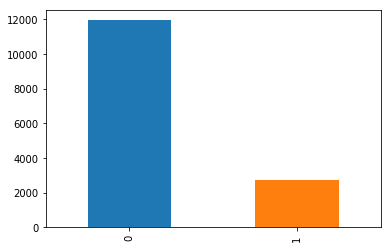

In [78]:
merged["Outcome"].value_counts().plot(kind="bar")

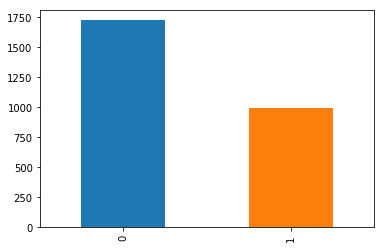

In [79]:
merged[merged['Outcome']==1]['CITY OWNED'].value_counts().plot(kind='bar')

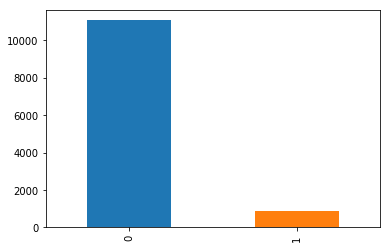

In [80]:
f2 = merged[merged['Outcome']==0]['CITY OWNED'].value_counts().plot(kind='bar')

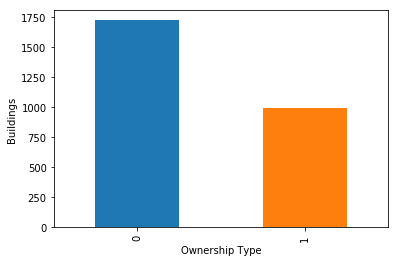

In [81]:
f1= merged[merged['Outcome']==1]['CITY OWNED'].value_counts()
f1.plot(kind='bar',label="Public")
f2.plot(kind="bar")
plt.xlabel("Ownership Type")
plt.ylabel("Buildings")
plt.show()

In [82]:
f1

0    1723
1     994
Name: CITY OWNED, dtype: int64

In [83]:
merged.to_csv(path+'Merged Dataset.csv')

In [84]:
##Building type by class.
#Building Class.
merged["Building Type"] = ""
res = ["A0","A1","A2","A3","A4","A5","A7","A8","A9","B1","B2","B3","B9","C0","C1","C2","C3","C4","C5","C6","C7","C8","C9","CM","D0","D1","D2","D3","D4","D5",
       "D6","D7","D8","D9","L1","L2","L3","L8","L9","S0","S1","S2","S3","S4","S5","S9","R0","R1","R2","R3","R4","R5","R6","R7","R8",
       "R9","RR","RA","RB","RC","RD","RG","RH","RI","RK","RM","RP","RS","RT","RW","RX","RZ"]
      
for i in range(0,len(merged)): 
    if merged["Building Class"][i] in res:
        merged["Building Type"][i] = "Residential"

In [85]:
com = ["E1","E2","E3","E4","E7","E9","F1","F2","F4","F5","F8","F9","G0","G1","G2","G3","G4","G5","G6","G7","G8","GU","G9",
      "HB","HH","HR","HS","H1","H2","H2","H3","H4","H5","H6","H7","H8","H9","O1","O2","O3","O4","O5","O6","O7","O8","O9",
      "K1","K2","K3","K4","K5","K6","K7","K8","K9","J1","J2","J3","J4","J5","J6","J7","J8","J9","P1","P2","P3","P4","P5",
       "P6","P7","P8","P9","M1","M2","M3","M4","M9"]
for i in range(0,len(merged)): 
    if merged["Building Class"][i] in com:
        merged["Building Type"][i] = "Commercial"

In [86]:
gov = ["N1","N2","N3","N4","N9","Q1","Q2","Q3","Q4","Q5","Q6","Q7","Q8","Q9","T1","T2","T9","V0","V1","V2","V3","V4","V5",
       "V6","V7","V8","V9","Y1","Y2","Y3","Y4","Y5","Y6","Y7","Y8","Y9","U1","U2","U3","U4","U5","U6","U7"]
for i in range(0,len(merged)): 
    if merged["Building Class"][i] in gov:
        merged["Building Type"][i] = "Government"

In [87]:
edu =["W1","W2","W3","W4","W5","W6","W7","W8","W9"]

for i in range(0,len(merged)): 
    if merged["Building Class"][i] in edu:
        merged["Building Type"][i] = "Educational"
        
med = ["I1","I2","I3","I4","I5","I6","I6","I7","I9"]

for i in range(0,len(merged)): 
    if merged["Building Class"][i] in med:
        merged["Building Type"][i] = "Medical"

misc =["Z0","Z1","Z2","Z3","Z4","Z5","Z7","Z8","Z9"]

for i in range(0,len(merged)): 
    if merged["Building Class"][i] in misc:
        merged["Building Type"][i] = "Miscellaneous"

In [88]:
merged.dtypes

BBL                     object
Bin                     object
Borough                 object
Exterior Wall Types     object
CB Number               object
Number Of Stories       object
Address                 object
Building Class          object
Building Front         float64
Building Area          float64
Lot Front              float64
Owner Name              object
Year Built              object
Historical              object
Proximity Code         float64
QEWI NAME               object
CITY OWNED               int32
COMP                     int32
ECB                      int32
DOB                      int32
DAN                      int32
Outcome                  int64
Building Type           object
dtype: object

In [89]:
merged['Building Type'].value_counts()

Residential      11846
Commercial        2053
Medical            271
Educational        246
Government         161
                    56
Miscellaneous       25
Name: Building Type, dtype: int64

In [90]:
## Further  more cleaning
merged["Building Front"] = merged["Building Front"].replace({0:" "})
merged["Building Area"] = merged["Building Area"].replace({0:" "})
merged["Lot Front"] = merged["Lot Front"].replace({0:" "})
merged["Year Built"] = merged["Year Built"].replace({'0':" "})

In [91]:
merged

,BBL,Bin,Borough,Exterior Wall Types,CB Number,Number Of Stories,Address,Building Class,Building Front,Building Area,...,Historical,Proximity Code,QEWI NAME,CITY OWNED,COMP,ECB,DOB,DAN,Outcome,Building Type
0,1000047501,1000005,MANHATTAN,STEEL,101,50,1 WATER STREET,RC,308,2.54256e+06,...,NaN,0.0,NaN,0,0,0,0,0,0,Residential
1,1000057501,1000006,MANHATTAN,ALUMINIUM,101,40,125 BROAD STREET,RB,,1.35469e+06,...,NaN,3.0,NaN,0,0,0,1,0,1,Residential
2,1000050010,1000007,MANHATTAN,NaN,101,22,115 BROAD STREET,O4,148,1.01641e+06,...,NaN,2.0,PAUL VALERIO,0,0,0,0,0,0,Commercial
3,1000080044,1000016,MANHATTAN,LIMESTONE STEEL,101,17,102 BROAD STREET,U4,,,...,NaN,0.0,ROY SOKOLOSKI,0,1,0,0,0,1,Government
4,1000090001,1000018,MANHATTAN,CURTAIN WALL,101,34,34 WHITEHALL STREET,O4,180,692431,...,NaN,1.0,NaN,0,0,0,0,0,0,Commercial
5,1000090014,1000020,MANHATTAN,NaN,101,41,17 STATE STREET,O4,176,544015,...,NaN,1.0,RICHARD LEFEVER,0,0,0,0,0,0,Commercial
6,1000090029,1000021,MANHATTAN,STEEL FRAME W/GLASS,101,35,24 STATE STREET,O4,131,896956,...,NaN,1.0,VINCENT STRAMANDINOLI,0,0,0,0,0,0,Commercial
7,1000100014,1000023,MANHATTAN,"ALUMINUM , GLASS",101,31,33 WHITEHALL STREET,O4,58,365792,...,NaN,3.0,PAUL MILLMAN,0,0,0,0,0,0,Commercial
8,1000100015,1000024,MANHATTAN,"PRESS BRICK,PRESS BRICK",101,8,27 WHITEHALL STREET,O6,33,14829,...,NaN,3.0,STANFORD CHAN,0,0,0,0,0,0,Commercial
9,1000100016,1000025,MANHATTAN,STONE,101,26,90 BROAD STREET,O4,121,336025,...,NaN,3.0,DOMINGO DIAZ,0,0,0,0,0,0,Commercial


In [92]:
merged.to_csv(path+'Final Facade dataset.csv')

In [93]:
merged["Building Area"].isna().sum()

56

In [94]:
merged.to_csv(path+'Merged dataset.csv',index= False)

## Owner Count

In [95]:
merged2 = merged[["Owner Name", "CITY OWNED"]]
merged2["Number Owned"] = 1

merged2["Owner Name"] = merged2["Owner Name"].astype(str).map(str.strip)

merged2["CITY OWNED"] = merged2["CITY OWNED"].astype(int)

merged2 = merged2.groupby(['Owner Name']).sum()

merged2 = merged2.add_suffix('').reset_index()

merged2 = merged2.sort_values(by = 'Number Owned', ascending=False).reset_index(drop=True)

merged2 = merged2.dropna()

#merge_vios2 = merge_vios2[merge_vios2["Owner Name"] != " "]
#merge_vios2 = merge_vios2[merge_vios2["Owner Name"] != "nan"]

merged2

,Owner Name,CITY OWNED,Number Owned
0,NYC HOUSING AUTHORITY,1489,1498
1,,1,1231
2,PARKCHESTER SOUTH CON,0,116
3,OWNER / AGENT,0,111
4,TRUSTEES OF COLUMBIA,0,109
5,NEW YORK UNIVERSITY,1,61
6,nan,3,56
7,NYC HOUSING DEVELOPME,2,55
8,NEW YORK CITY HOUSING,53,53
9,"PPC RESIDENTIAL, LLC",0,53


In [96]:
merged2 = merged2[merged2["Owner Name"] != ""].reset_index(drop =True)
merged2 = merged2[merged2["Owner Name"] != "nan"].reset_index(drop =True)
merged2

,Owner Name,CITY OWNED,Number Owned
0,NYC HOUSING AUTHORITY,1489,1498
1,PARKCHESTER SOUTH CON,0,116
2,OWNER / AGENT,0,111
3,TRUSTEES OF COLUMBIA,0,109
4,NEW YORK UNIVERSITY,1,61
5,NYC HOUSING DEVELOPME,2,55
6,NEW YORK CITY HOUSING,53,53
7,"PPC RESIDENTIAL, LLC",0,53
8,"BSC HOUSING COMPANY,",0,46
9,NYC CITY HSG AUTRHORI,43,43


In [97]:
#Unsafe Buildings Owner Count
owner_cnt = merged[merged['Outcome']==1]['Owner Name'].value_counts().to_frame(name="Total Unsafe Buildings")

In [98]:
owner_cnt.index.name ='Owner Name'
#owner_cnt.to_csv(path+'Unsafe Buildings Owner Name')

In [99]:
owner_cnt = pd.merge(owner_cnt,merged[['Owner Name','CITY OWNED']],on=['Owner Name'])

In [100]:
owner_cnt= owner_cnt.drop_duplicates(['Owner Name']).reset_index(drop=True)

In [101]:
owner_cnt = owner_cnt[owner_cnt["Owner Name"] != " "]
owner_cnt = owner_cnt[owner_cnt["Owner Name"] != "nan"]
owner_cnt

,Owner Name,Total Unsafe Buildings,CITY OWNED
0,NYC HOUSING AUTHORITY,821,1
2,NEW YORK CITY HOUSING,39,1
3,NYC CITY HSG AUTRHORI,25,1
4,NYC HOUSING DEVELOPME,18,1
5,NYC HOUSING AUTHORIT,17,1
6,HEALTH AND HOSPITALS,15,1
7,DCAS,13,1
8,OWNER / AGENT,11,0
9,DCAS/DEPARTMENT OF ED,9,1
10,ROYAL CHARTER PROPERT,7,0


In [102]:
owner_cnt["Total Unsafe Buildings"].nlargest(10)

0     821
2      39
3      25
4      18
5      17
6      15
7      13
8      11
9       9
10      7
Name: Total Unsafe Buildings, dtype: int64

In [103]:
owner_cnt2 = merged[merged['Outcome']==0]['Owner Name'].value_counts().to_frame(name="Total Safe Buildings")
owner_cnt2.index.name ='Owner Name'
owner_cnt2 = pd.merge(owner_cnt2,merged[['Owner Name','CITY OWNED']],on=['Owner Name'])
owner_cnt2= owner_cnt2.drop_duplicates(['Owner Name']).reset_index(drop=True)
owner_cnt2

,Owner Name,Total Safe Buildings,CITY OWNED
0,,1138,0
1,NYC HOUSING AUTHORITY,677,1
2,PARKCHESTER SOUTH CON,111,0
3,TRUSTEES OF COLUMBIA,106,0
4,OWNER / AGENT,100,0
5,NEW YORK UNIVERSITY,56,0
6,"PPC RESIDENTIAL, LLC",51,0
7,"BSC HOUSING COMPANY,",46,0
8,NYC HOUSING DEVELOPME,37,1
9,RIVERBAY CORPORATION,35,0


In [104]:
owner_cnt2["Total Safe Buildings"].nlargest(10)

0    1138
1     677
2     111
3     106
4     100
5      56
6      51
7      46
8      37
9      35
Name: Total Safe Buildings, dtype: int64

In [105]:
owner_cnt2 = owner_cnt2[owner_cnt2["Owner Name"] != " "]
owner_cnt2 = owner_cnt2[owner_cnt2["Owner Name"] != "nan"]
owner_cnt2.head()

,Owner Name,Total Safe Buildings,CITY OWNED
1,NYC HOUSING AUTHORITY,677,1
2,PARKCHESTER SOUTH CON,111,0
3,TRUSTEES OF COLUMBIA,106,0
4,OWNER / AGENT,100,0
5,NEW YORK UNIVERSITY,56,0


# Visualization 

In this part we will explore some of statistical analysis and affect of some independent varibales on buildings violation. 

In [106]:
dfo = pd.merge(owner_cnt2,owner_cnt[["Owner Name","Total Unsafe Buildings"]],how='left',on='Owner Name')
dfo["Total Unsafe Buildings"] =dfo["Total Unsafe Buildings"].astype(str).replace('\.0', '', regex=True)
dfo = dfo[dfo["Total Unsafe Buildings"] != "nan"]
dfo["Total Unsafe Buildings"] = dfo["Total Unsafe Buildings"].astype(int)
#dfo["Total Safe Buildings"] = dfo["Total Safe Buildings"].nlargest(10)
#dfo = dfo.sort_values(by=['Total Unsafe Buildings','Total Safe Buildings'],ascending=False)
#dfo = dfo.sort_values(by='Total Safe Buildings',ascending =False).reset_index()
dfo = dfo.sort_values(['Total Unsafe Buildings','Total Safe Buildings'],ascending = [False,False]).reset_index(drop =True)
dfo1 = dfo.head(13)
dfo1

,Owner Name,Total Safe Buildings,CITY OWNED,Total Unsafe Buildings
0,NYC HOUSING AUTHORITY,677,1,821
1,NEW YORK CITY HOUSING,14,1,39
2,NYC CITY HSG AUTRHORI,18,1,25
3,NYC HOUSING DEVELOPME,37,1,18
4,NYC HOUSING AUTHORIT,9,1,17
5,HEALTH AND HOSPITALS,9,1,15
6,DCAS,13,1,13
7,OWNER / AGENT,100,0,11
8,DCAS/DEPARTMENT OF ED,14,1,9
9,ROYAL CHARTER PROPERT,5,0,7


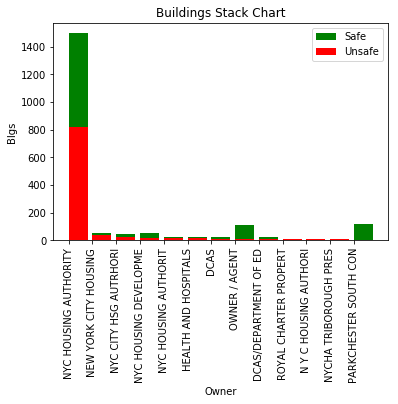

<Figure size 1440x1080 with 0 Axes>

In [107]:
barWidth = 1
plt.bar(dfo1['Owner Name'], dfo1['Total Safe Buildings'], color='green',bottom=dfo1["Total Unsafe Buildings"],label ='Safe',align ='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(dfo1['Owner Name'], dfo1['Total Unsafe Buildings'], color='red',label ='Unsafe',align ='edge')

plt.ylabel("Blgs")
plt.xlabel("Owner")
plt.legend(loc="upper right")
#plt.axis([0,2000])
#plt.yticks(np.arange(0,1000,100))
plt.xticks(dfo1['Owner Name'], rotation=90)
plt.title("Buildings Stack Chart")
#plt.grid('on')
plt.figure(figsize=(20,15))
plt.show()

In [108]:
dfo1

,Owner Name,Total Safe Buildings,CITY OWNED,Total Unsafe Buildings
0,NYC HOUSING AUTHORITY,677,1,821
1,NEW YORK CITY HOUSING,14,1,39
2,NYC CITY HSG AUTRHORI,18,1,25
3,NYC HOUSING DEVELOPME,37,1,18
4,NYC HOUSING AUTHORIT,9,1,17
5,HEALTH AND HOSPITALS,9,1,15
6,DCAS,13,1,13
7,OWNER / AGENT,100,0,11
8,DCAS/DEPARTMENT OF ED,14,1,9
9,ROYAL CHARTER PROPERT,5,0,7


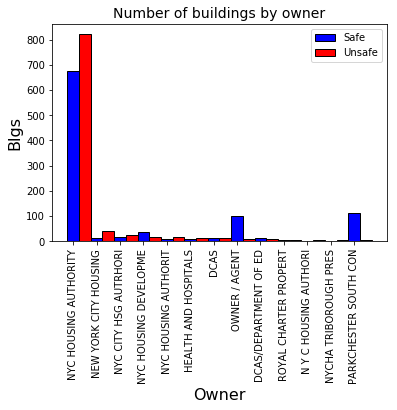

In [109]:
#Owner = ['NYC HOUSING AUTHORITY','NEW YORK CITY HOUSING','NYC CITY HSG AUTRHORI','NYC HOUSING DEVELOPME','NYC HOUSING AUTHORIT',
       #'HEALTH AND HOSPITALS','DCAS','OWNER / AGENT','DCAS/DEPARTMENT OF ED','NYCHA TRIBOROUGH PRES','N Y C HOUSING AUTHORI',
       # 'ROYAL CHARTER PROPERT','PARKCHESTER SOUTH CON']
Owner= dfo1["Owner Name"]
pos = np.arange(len(Owner))
bar_width = 0.5
label =['Safe','Unsafe']
 
plt.bar(pos,dfo1["Total Safe Buildings"],bar_width,color='blue',label='Safe',edgecolor='black')
plt.bar(pos+bar_width,dfo1["Total Unsafe Buildings"],bar_width,color='red',label='Unsafe',edgecolor='black')
plt.xticks( np.arange(len(dfo1["Owner Name"])))
plt.xlabel('Owner', fontsize=16)
plt.ylabel('Blgs', fontsize=16)
plt.xticks(pos, Owner,rotation=90)
plt.title('Number of buildings by owner',fontsize=14)
plt.legend(label,loc="upper right")
plt.show()

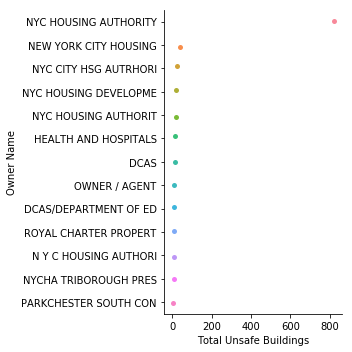

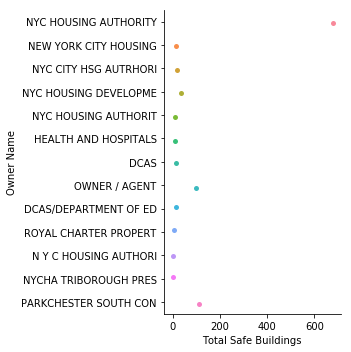

In [110]:
import seaborn as sns
sns.catplot(y="Owner Name",x="Total Unsafe Buildings",data=dfo1)
sns.catplot(y="Owner Name",x="Total Safe Buildings",data=dfo1)

## Scatter Plots


In [111]:
yb = merged[merged['Outcome']==1]['Year Built'].value_counts().to_frame('Unsafe')
yb.index.name = 'Year'
yb = yb.sort_values(by = 'Unsafe', ascending=False).reset_index()
yb = yb.dropna(subset = ['Year']).reset_index(drop =True)


In [112]:
yb = yb[yb['Year']!= ' ']
yb['Year'] = yb['Year'].astype(int)
yb.dtypes

Year      int32
Unsafe    int64
dtype: object

In [113]:
yb2 = merged[merged['Outcome']==0]['Year Built'].value_counts().to_frame('Safe')
yb2.index.name = 'Year'
yb2 = yb2.sort_values(by = 'Safe', ascending=False).reset_index()
yb2 = yb2.dropna(subset = ['Year']).reset_index(drop =True)
yb2 = yb2[yb2['Year']!= ' ']
#yb2['Year'] = yb2['Year'].astype(int)
yb2.dtypes

Year    object
Safe     int64
dtype: object

In [114]:
yb2 = yb2[yb2['Year']!= 'nan']
yb2['Year'] = yb2['Year'].astype(int)
yb2.dtypes

Year    int32
Safe    int64
dtype: object

In [115]:
###work on the stacked bar cahrt

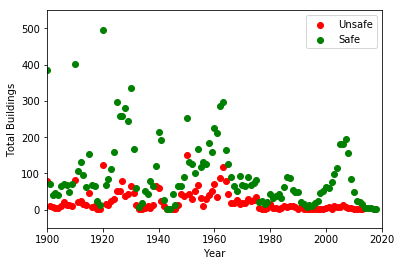

In [116]:
fig, ax = plt.subplots()
ax.scatter(x= yb['Year'],y=yb['Unsafe'], label="Unsafe", color="r")
ax.scatter(x= yb2['Year'],y=yb2['Safe'], label="Safe", color="g")                                   
ax.set_xlabel("Year")
ax.set_ylabel("Total Buildings")
ax.set_xlim(1900,2020)
ax.set_ylim(-50,550)
#ax.grid(color='w', linestyle='-', linewidth=2)
ax.legend(scatterpoints=1)

In [117]:
yb2

,Year,Safe
0,1920,497
1,1910,403
2,1900,386
3,1930,335
4,1925,298
5,1963,297
6,1962,285
7,1928,280
8,1927,258
9,1926,258


In [118]:
yb.dtypes

Year      int32
Unsafe    int64
dtype: object

<Figure size 1440x720 with 0 Axes>

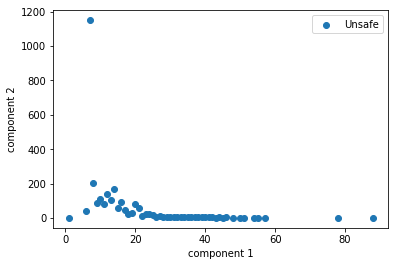

In [119]:
ns = merged[merged['Outcome']==1]['Number Of Stories'].value_counts().to_frame('Unsafe')
ns.index.name = 'Stories'
#ns = ns.sort_values('Stories').reset_index()
#_= plt.scatter(x = ns.index,y = yb['Total Vios'])
#_= plt.show()
#ns.plot(kind='line')
#ns = ns.groupby(['Stories']).sum()

#ns = ns.add_suffix('').reset_index()

ns = ns.sort_values(by = 'Unsafe', ascending=False).reset_index()
ns = ns[ns["Stories"] != '6+B' ]
ns['Stories'] = ns['Stories'].astype(int)

fig = plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ax.scatter(x = ns['Stories'], y= ns['Unsafe'])
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.legend(scatterpoints=1)


In [120]:
ns2 = merged[merged['Outcome']==0]['Number Of Stories'].value_counts().to_frame('Safe')
ns2.index.name = 'Stories'

ns2 = ns2.sort_values(by = 'Safe', ascending=False).reset_index()
ns2 = ns2[ns2["Stories"] != '6+B' ]
ns2['Stories'] = ns2['Stories'].astype(int)
ns2

,Stories,Safe
0,7,4542
1,8,920
2,12,753
3,9,548
4,13,489
5,16,488
6,10,482
7,14,449
8,15,381
9,11,364


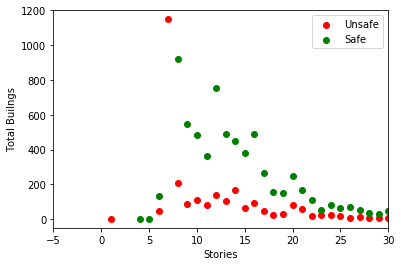

In [121]:
fig, ax = plt.subplots()
ax.scatter(x= ns['Stories'],y=ns['Unsafe'], label="Unsafe", color="r")
ax.scatter(x= ns2['Stories'],y=ns2['Safe'], label="Safe", color="g")                                   
ax.set_xlabel("Stories")
ax.set_ylabel("Total Builngs")
ax.set_xlim(-5,30)
ax.set_ylim(-50,1200)
ax.legend(scatterpoints=1)

In [122]:
ns.dtypes

Stories    int32
Unsafe     int64
dtype: object

## Stacked BAR chart

In [123]:
df = pd.merge(yb,yb2,how='left',on='Year')

In [124]:
df["Safe"] =df["Safe"].astype(str).replace('\.0', '', regex=True)
 

In [125]:
df =df[df["Safe"]!= " "]
df =df[df["Safe"]!= "nan"]


In [126]:
df["Safe"] = df["Safe"].astype(int)

In [127]:
df.dtypes

Year      int32
Unsafe    int64
Safe      int32
dtype: object

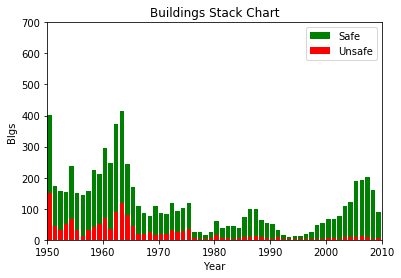

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

#matplotlib.style.use('ggplot')
 
# y-axis in bold
#rc('font', weight='bold')
barWidth = 1
plt.bar(df['Year'], df['Safe'], color='green',label ='Safe',bottom = df['Unsafe'],align ='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(df['Year'],df['Unsafe'], color='red',label ='Unsafe',align ='edge')

plt.ylabel("Blgs")
plt.xlabel("Year")
plt.legend(loc="upper right")
plt.axis([1980,2000,0,700])
plt.xticks(np.arange(1950,2018,10))
plt.title("Buildings Stack Chart")
#plt.grid('on')

plt.show()

In [129]:
df1 = pd.merge(ns,ns2,how='left',on='Stories')

In [130]:
df1["Safe"] =df1["Safe"].astype(str).replace('\.0', '', regex=True)
df1 =df1[df1["Safe"]!= " "]
df1 =df1[df1["Safe"]!= "nan"]
df1["Safe"] = df1["Safe"].astype(int)

In [131]:
df1.dtypes

Stories    int32
Unsafe     int64
Safe       int32
dtype: object

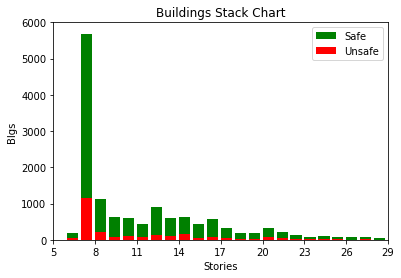

In [132]:
barWidth = 1
plt.bar(df1['Stories'], df1['Safe'], color='green',label ='Safe',bottom = df1['Unsafe'],align ='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(df1['Stories'],df1['Unsafe'], color='red',label ='Unsafe',align ='edge')

plt.ylabel("Blgs")
plt.xlabel("Stories")
plt.legend(loc="upper right")
plt.axis([6,24,1,6000])
plt.xticks(np.arange(5,30,3))
plt.title("Buildings Stack Chart")
#plt.grid('on')

plt.show()

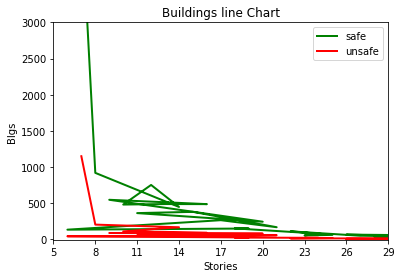

In [133]:
plt.plot( df1['Stories'], df1['Safe'],  marker='', color='green', linewidth=2,label="safe")
plt.plot( df1['Stories'], df1['Unsafe'], marker='', color='red', linewidth=2, label="unsafe")

plt.ylabel("Blgs")
plt.xlabel("Stories")
plt.legend(loc="upper right")
plt.axis([6,24,-5,3000])
plt.xticks(np.arange(5,30,3))
plt.title("Buildings line Chart")
plt.show()

In [134]:
##Building Area
ba = merged[merged['Outcome']==1]['Building Area'].value_counts().to_frame('Unsafe')
ba.index.name = 'Area'

ba = ba.sort_values(by = 'Unsafe', ascending=False).reset_index()
ba = ba[ba["Area"]!= " "]
ba['Area'] = ba['Area'].astype(int)
ba.dtypes

Area      int32
Unsafe    int64
dtype: object

In [135]:
ba2 = merged[merged['Outcome']==0]['Building Area'].value_counts().to_frame('Safe')
ba2.index.name = 'Area'

ba2 = ba2.sort_values(by = 'Safe', ascending=False).reset_index()
ba2 = ba2[ba2["Area"]!= " "]
ba2['Area'] = ba2['Area'].astype(int)
ba2.dtypes

Area    int32
Safe    int64
dtype: object

In [136]:
dfa = pd.merge(ba,ba2,how='left',on='Area')
dfa.dtypes

Area        int32
Unsafe      int64
Safe      float64
dtype: object

In [137]:
dfa.head()

,Area,Unsafe,Safe
0,1116500,20,2.0
1,987444,19,1.0
2,1526800,17,6.0
3,2948300,16,2.0
4,553197,14,1.0


In [138]:
dfa["Safe"] =dfa["Safe"].astype(str).replace('\.0', '', regex=True)
dfa =dfa[dfa["Safe"]!= " "]
dfa =dfa[dfa["Safe"]!= "nan"]
dfa["Safe"] = dfa["Safe"].astype(int)

In [139]:
dfa =dfa.reset_index(drop=True)

In [140]:
dfa

,Area,Unsafe,Safe
0,1116500,20,2
1,987444,19,1
2,1526800,17,6
3,2948300,16,2
4,553197,14,1
5,810000,14,1
6,820910,13,1
7,825480,12,1
8,666256,12,2
9,1389532,10,3


In [141]:
#binned = dfa["Area"].groupby(dfa["Area"].index // 50).sum()
#binned.plot.bar()

bin_values = np.arange(start=100, stop=15040113, step=1960000)
print (bin_values)

[     100  1960100  3920100  5880100  7840100  9800100 11760100 13720100]


No handles with labels found to put in legend.


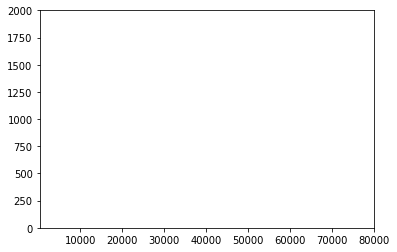

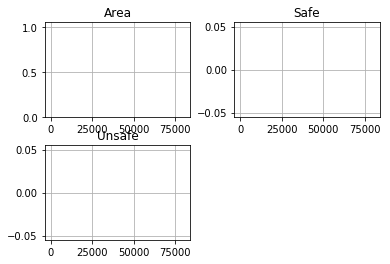

In [142]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()  
plt.axis([300, 80000, 0, 2000])  

# From your example I am assuming that the maximum value is 6000
binBoundaries = np.linspace(300,80000,50000)

dfa.hist(bins=binBoundaries, label='A') 


plt.title('A Histogram')  
plt.xlabel('x-axis')  
plt.ylabel('y-axis')  
plt.legend()
plt.show()


In [143]:
df

,Year,Unsafe,Safe
0,1950,151,252
1,1920,122,497
2,1963,119,297
3,1962,88,285
4,1910,81,403
5,1927,80,258
6,1964,79,166
7,1900,78,386
8,1960,71,225
9,1954,68,168


In [145]:
beta, alpha = np.polyfit(df.Year, dfa.Area.nlargest(121), 1)
print('beta: %0.3f, alpha: %0.1f.' % (beta, alpha))
print()

beta: -4024.493, alpha: 9068716.6.



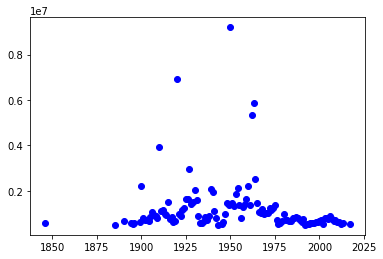

In [146]:
_ = plt.plot(df.Year, dfa.Area.nlargest(121), color='blue', marker='.', markersize=12, linestyle='none')
_ = plt.plot( color='red', linewidth=4)
_ = plt.title('')

Text(0.5, 1.0, 'Buildings Stack Chart')

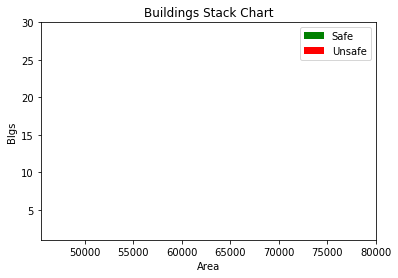

In [149]:
barWidth = 1
plt.bar(dfa['Area'], dfa['Safe'], color='green',label ='Safe',bottom = dfa['Unsafe'],align ='edge')
# Create green bars (middle), on top of the firs ones
plt.bar(dfa['Area'],dfa['Unsafe'], color='red',label ='Unsafe',align ='edge')

plt.ylabel("Blgs")
plt.xlabel("Area")
plt.legend(loc="upper right")
plt.axis([45500,80000,1,30])
plt.title("Buildings Stack Chart")
#plt.grid('on')

plt.show()

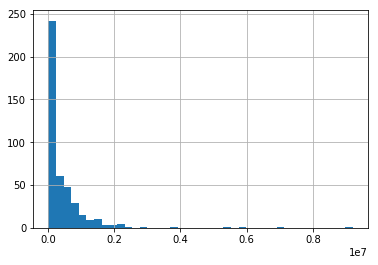

In [150]:
dfa["Area"].hist(bins=40)

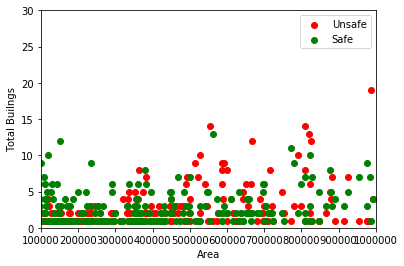

In [151]:
fig, ax = plt.subplots()
ax.scatter(x= dfa['Area'],y=dfa['Unsafe'], label="Unsafe", color="r")
ax.scatter(x= dfa['Area'],y=dfa['Safe'], label="Safe", color="g")                                   
ax.set_xlabel("Area")
ax.set_ylabel("Total Builngs")
ax.set_xlim(100000,1000000)
ax.set_ylim(-0,30)
ax.legend(scatterpoints=1)

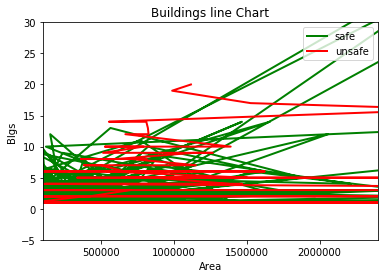

In [152]:
plt.plot( dfa['Area'], dfa['Safe'],  marker='', color='green', linewidth=2,label="safe")
plt.plot( dfa['Area'], dfa['Unsafe'], marker='', color='red', linewidth=2, label="unsafe")

plt.ylabel("Blgs")
plt.xlabel("Area")
plt.legend(loc="upper right")
plt.axis([100000,2400000,-5,30])
#plt.xticks(np.arange(5,30,3))
plt.title("Buildings line Chart")
plt.show()

In [ ]:
dfa

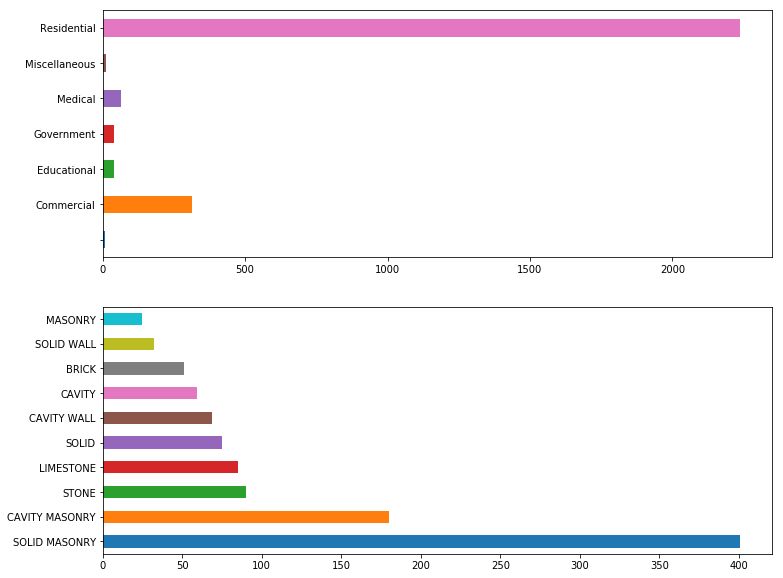

In [153]:
fig, axarr = plt.subplots(2, 1, figsize=(12,10))
merged[merged['Outcome']==1]['Building Type'].value_counts().sort_index().plot.barh(
    ax=axarr[0]
)

merged[merged['Outcome']==1]['Exterior Wall Types'].value_counts().nlargest(10).plot.barh(
    ax=axarr[1]
)


In [154]:
merged[merged['Outcome']==1]['Building Area'].value_counts().nlargest(20)

             25
1116500.0    20
987444.0     19
1526800.0    17
2948300.0    16
553197.0     14
810000.0     14
820910.0     13
825480.0     12
666256.0     12
1389532.0    10
502023.0     10
526690.0     10
791000.0     10
1136208.0     9
502525.0      9
587170.0      9
592500.0      9
513000.0      9
1264820.0     9
Name: Building Area, dtype: int64

In [ ]:
dfa.to_csv(path+'test.csv')

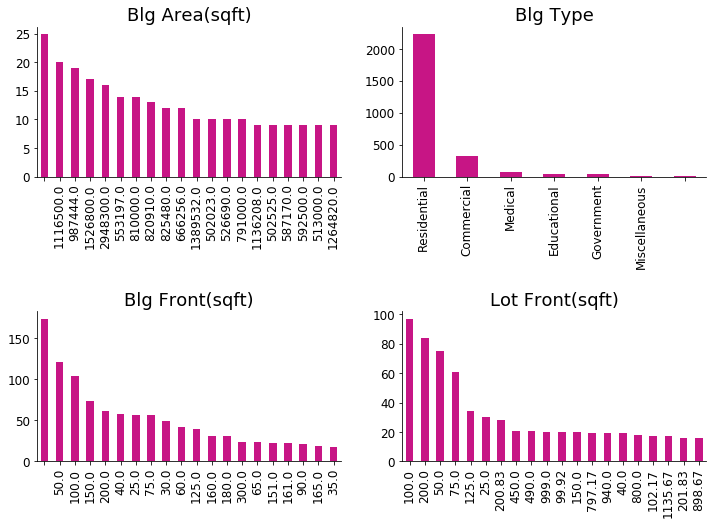

In [155]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

merged[merged['Outcome']==1]['Building Area'].value_counts().nlargest(20).plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Blg Area(sqft)", fontsize=18)

merged[merged['Outcome']==1]['Building Front'].value_counts().nlargest(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Blg Front(sqft)", fontsize=18)

merged[merged['Outcome']==1]['Lot Front'].value_counts().nlargest(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Lot Front(sqft)", fontsize=18)

merged[merged['Outcome']==1]['Building Type'].value_counts().plot.bar(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Blg Type", fontsize=18)

plt.subplots_adjust(hspace=.9)

import seaborn as sns
sns.despine()

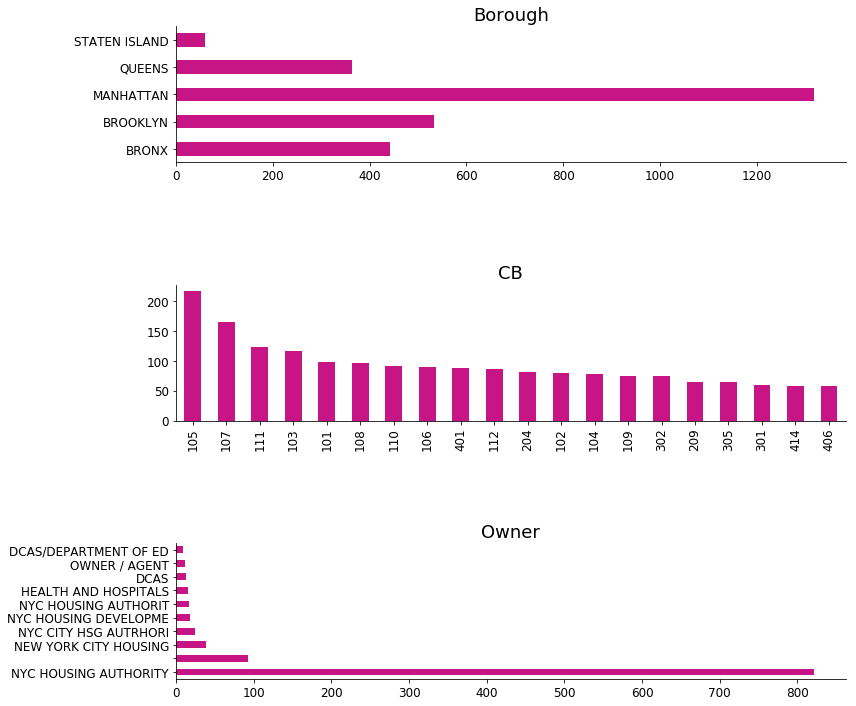

In [156]:
fig, axarr = plt.subplots(3, 1, figsize=(12, 12))

merged[merged['Outcome']==1]['Owner Name'].value_counts().nlargest(10).plot.barh(
    ax=axarr[2], fontsize=12, color='mediumvioletred'
)
axarr[2].set_title("Owner",fontsize=18)
merged[merged['Outcome']==1]['CB Number'].value_counts().nlargest(20).plot.bar(
    ax=axarr[1], fontsize=12, color='mediumvioletred'
)
axarr[1].set_title("CB",fontsize=18)

merged[merged['Outcome']==1]['Borough'].value_counts().sort_index().plot.barh(
    ax=axarr[0], fontsize=12, color='mediumvioletred'
)
axarr[0].set_title("Borough",fontsize=18)

plt.subplots_adjust(hspace=.9)

import seaborn as sns
sns.despine()

### So, buildings that are in Manhattan, residential,exterior made up of Solid Masonry and under NYCHA are tends to have more violation. 

In [ ]:
sns.jointplot(x='Year', y='Unsafe', data=df, kind='hex')

# Analysis on Owner Name from different Source

Trying to get owner name from different source so that we can use it further for our model. 

### MANHATTAN OWNER

In [157]:
#Manhattan ownership
pd.set_option('chained_assignment', None)
df_manh = pd.read_csv(path+'Manhattan.csv',encoding ='windows-1252')
df_manh

C:\Users\tahalam\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,17,18,19,20,21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BIN Number,P_FIN_OWNER_NAME (ownership),Owner Name (boiler),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,TR6 Owner Full Name (Façade),...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Owner Name (elevator),Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1000002,U S GOVT LAND & BLDGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000003,10 SOUTH STREET LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000004,UNITED STATES AMERICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000005,ONE NY PLAZA CO LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JOSEPH SYSLO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000006,125 BROAD CONDOMINIUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DAWN KEYS,...,NaN,NaN,NaN,NaN,NaN,DAWN KEYS,NaN,NaN,NaN,NaN
5,1000007,4 NYP VENTURES LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALFRED RICCARDI,...,NaN,NaN,NaN,NaN,NaN,MICHAEL CLARKE,NaN,NaN,NaN,NaN
6,1000008,PH WATER STREET LLC,CHRISTOPHER VECCHIARELLI,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1000009,MAYIM MGMT LLC,BENJAMIN OHEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000010,SONS OF THE REVOLUTION STATE O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000011,SONS OF THE REVOLUTION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
df_manh = df_manh[["BIN Number","P_FIN_OWNER_NAME (ownership)"]]

In [159]:
df_manh

,BIN Number,P_FIN_OWNER_NAME (ownership)
0,1000002,U S GOVT LAND & BLDGS
1,1000003,10 SOUTH STREET LLC
2,1000004,UNITED STATES AMERICA
3,1000005,ONE NY PLAZA CO LLC
4,1000006,125 BROAD CONDOMINIUM
5,1000007,4 NYP VENTURES LLC
6,1000008,PH WATER STREET LLC
7,1000009,MAYIM MGMT LLC
8,1000010,SONS OF THE REVOLUTION STATE O
9,1000011,SONS OF THE REVOLUTION


In [160]:
merge_c= merged[["Bin","Owner Name"]]

df_manh["BIN Number"] = df_manh["BIN Number"].astype(str)
df_manhDic =df_manh.set_index('BIN Number')['P_FIN_OWNER_NAME (ownership)'].to_dict()

df_manhDic

{'1000002': 'U S GOVT LAND & BLDGS ',
 '1000003': '10 SOUTH STREET LLC ',
 '1000004': 'UNITED STATES AMERICA ',
 '1000005': 'ONE NY PLAZA CO LLC ',
 '1000006': '125 BROAD CONDOMINIUM ',
 '1000007': '4 NYP VENTURES LLC ',
 '1000008': 'PH WATER STREET LLC ',
 '1000009': 'MAYIM MGMT LLC ',
 '1000010': 'SONS OF THE REVOLUTION STATE O ',
 '1000011': 'SONS OF THE REVOLUTION ',
 '1000012': 'FASHION MANAGEMENT CORP ',
 '1000013': 'SONS OF THE REVOLUTION STATE O ',
 '1000014': 'PEARL 60 LLC ',
 '1000016': 'VERIZON NEW YORK INC ',
 '1000017': 'AI IV LLC ',
 '1000018': 'ONE STATE STREET, LLC ',
 '1000019': 'THE MISSION OF OUR LADY OF ROS ',
 '1000020': '17 STATE OWNER LLC ',
 '1000021': 'STATE WHITEHALL CO ',
 '1000022': 'FRANKLIN BH LLC ',
 '1000023': 'BROAD FINANCIAL CENTE ',
 '1000024': 'MSA TWINS LTD. ',
 '1000025': 'BROAD STREET PLAZA, LLC ',
 '1000026': 'JMW RESTAURANT CORP ',
 '1000027': 'ONE WHITEHALL L P ',
 '1000028': '6 STONE STREET LLC ',
 '1000029': '2 BROADWAY GROUND LEASE ',
 '1000

In [161]:
merge_c["Owner_Manhattan"] = merge_c["Bin"].map(df_manhDic)
merge_c["Owner_Manhattan"].isna().sum()

6100

In [162]:
merge_c.to_csv(path+'owner_manh.csv',index=False)

### BROOKLYN OWNER

In [163]:
#Brooklyn ownership
df_brok = pd.read_csv(path+'Brooklyn.csv',encoding ='windows-1252')
df_brok


C:\Users\tahalam\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,BIN Number,P_FIN_OWNER_NAME (ownership),Owner Name (boiler),Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,TR6 Owner Full Name (Façade),...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Owner Name (elevator),Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,3000002,SAFDI PLAZA PROPERTY LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHRISTOPHER PARDO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3000003,CONSOLIDATED EDISON CO.OF N.Y.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3000004,NYC PARKS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3000007,PARKS AND RECREATION (GENERAL),NINA BOWERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000010,20 JAY LLC,GEORGE PASTOR,NaN,NaN,NaN,NaN,NaN,NaN,BRENDAN PRINCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3000011,"FORMAN FERRY, LLC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000012,25 JAY STREET LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3000013,NOT ON FILE,DONNA AGOSTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,DONNA AGOSTA,NaN,NaN,NaN,NaN
8,3000014,23-35 BRIDGE STREET LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3000015,23-35 BRIDGE STREET LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df_brok["BIN Number"] = df_brok["BIN Number"].astype(str)
df_brokDic =df_brok.set_index('BIN Number')['P_FIN_OWNER_NAME (ownership)'].to_dict()

df_brokDic

{'3000002': 'SAFDI PLAZA PROPERTY LLC ',
 '3000003': 'CONSOLIDATED EDISON CO.OF N.Y. ',
 '3000004': 'NYC PARKS ',
 '3000007': 'PARKS AND RECREATION (GENERAL) ',
 '3000010': '20 JAY LLC ',
 '3000011': 'FORMAN FERRY, LLC ',
 '3000012': '25 JAY STREET LLC ',
 '3000013': 'NOT ON FILE ',
 '3000014': '23-35 BRIDGE STREET LLC ',
 '3000015': '23-35 BRIDGE STREET LLC ',
 '3000016': '23-35 BRIDGE STREET LLC ',
 '3000017': 'CONSOLIDATED EDISON CO.OF N.Y. ',
 '3000018': 'TUCK-IT-AWAY ASSOCIATES - DUMB ',
 '3000019': 'BROOKLYN BRIDGE PARK DEVELOPME ',
 '3000020': 'DUMBO PARTNERS B LLC ',
 '3000021': 'DUMBO PARTNERS B LLC ',
 '3000022': 'WASHINGTON BROOKLYNCORP ',
 '3000023': 'WATER STREET REALTY GROUP, LLC ',
 '3000024': 'WATER STREET REALTY GROUP, LLC ',
 '3000025': 'PLYMOUTH REALTY CORP ',
 '3000026': '155 WATER ST ASSOCIATES ',
 '3000027': 'LEHNE, OLIVER ',
 '3000028': '177 WATER LIMITED PAR ',
 '3000029': 'NEB REALTY CORP ',
 '3000030': '39 PEARL STREET LLC ',
 '3000031': 'SCENIQUE LLC ',
 '300

In [165]:
merge_c["Owner_Brooklyn"] = merge_c["Bin"].map(df_brokDic)
#merge_c
df_brok["P_FIN_OWNER_NAME (ownership)"].value_counts()

NOT ON FILE                        5562
NYC HOUSING AUTHORITY              1379
PARKS AND RECREATION (GENERAL)     1034
DEPARTMENT OF EDUCATION             525
NAME NOT ON FILE                    523
HOUSING PRESERVATION & DEVELOP      439
NYC TRANSIT                         204
NYC PARKS                           203
NYC DSBS                            174
THE UNITED STATES OF  AMERICA       132
POLICE DEPARTMENT                   127
FILLMORE GARDENS CO-OPERATIVE,      122
HP MARCUS GARVEY PRESERVATION       117
INDEPENDENCE GRDN OWNERS CORP       116
OCPARD REALTY ENTERPRISES L.P.      115
DCAS                                 98
DEPT OF ENVIRONMENTAL PROTECTI       96
FIRE DEPARTMENT                      96
NEHEMIAH SPRING CREEK AFFORDAB       83
NYSANDY11 MARINE PARK LLC            82
MHANY 2015 HOUSING DEVELOPMENT       82
PRATT INSTITUTE                      80
NYC DOT                              79
OCEANGATE L.P.                       79
FULTON PK ASSOC                      77


### DOB E-FILING OWNER

In [166]:
patho = "C:\\Users\\tahalam\\Documents\\FACADE SAFETY PROJECTS\\OWNER\\"
dfe =pd.read_csv(patho+'E-Filing_Owner.csv')
dfe["N_BIN"]= dfe['N_BIN'].astype(str)
dfe["Owner Name"] = dfe["N_FIRST_NAME"] + " "+dfe["N_LAST_NAME"]
dfe

,N_BIN,N_LAST_NAME,N_FIRST_NAME,Owner Name
0,1000003,COTE,RICHARD,RICHARD COTE
1,1000005,SYSLO,JOSEPH,JOSEPH SYSLO
2,1000006,BUETTNER,KENNETH,KENNETH BUETTNER
3,1000007,CLARKE,MICHAEL,MICHAEL CLARKE
4,1000007,CLARKE SR,MICHAEL,MICHAEL CLARKE SR
5,1000010,SERAFIN,MARIAN,MARIAN SERAFIN
6,1000011,SERAFIN,MARIAN,MARIAN SERAFIN
7,1000013,SERAFIN,MARIAN,MARIAN SERAFIN
8,1000018,WOLFSON,ABRAHAM,ABRAHAM WOLFSON
9,1000021,WILLIAM,LAFFEY,LAFFEY WILLIAM


In [167]:
set(dff["Bin"]) & set(dfe["N_BIN"])
match = set(dfe["N_BIN"]).intersection(dff["Bin"])
print("matching bins:",len(match))
print("Percentage:",len(match)*100/len(dff))

matching bins: 5778
Percentage: 39.41874744167008


In [168]:
dfe["N_BIN"] = dfe["N_BIN"].astype(str)
dfe["Owner Name"] = dfe["Owner Name"].astype(str)
#dfe = dfe.groupby(['N_BIN'])['Owner Name'].apply(lambda x:','.join(str(x) for x in list(set(s)))).reset_index()
dfe = dfe.groupby(['N_BIN'])['Owner Name'].apply(lambda x:','.join(x)).reset_index()
dfe_Dic =dfe.set_index('N_BIN')['Owner Name'].to_dict()

dfe_Dic

{'1000003': 'RICHARD COTE',
 '1000005': 'JOSEPH SYSLO',
 '1000006': 'KENNETH BUETTNER',
 '1000007': 'MICHAEL CLARKE,MICHAEL CLARKE SR',
 '1000010': 'MARIAN SERAFIN',
 '1000011': 'MARIAN SERAFIN',
 '1000013': 'MARIAN SERAFIN',
 '1000018': 'ABRAHAM WOLFSON',
 '1000021': 'LAFFEY WILLIAM',
 '1000022': 'CHARLES DAYAN,KAMALJIT SINGH',
 '1000024': 'VIVIAN AMALFITANO,KAMALJIT SINGH,TEHL SINGH',
 '1000025': 'JULIE ARCE,ROBERT BENEDETTO,CHRISTOPHER DOWNES,DAVID TAWFIK,DAVID TWAFIK',
 '1000027': 'CORINNE CAGGIANO,HENNESSY EUGENE',
 '1000028': 'BRIAN MURPHY',
 '1000030': 'JOHN YOUNG',
 '1000034': 'DIMITRIOS  LIBERATOS',
 '1000036': 'HINMAN AU',
 '1000037': 'GRUSS EMANUEL',
 '1000038': 'DANIEL BLANCO',
 '1000039': 'MIKE ZALESKI',
 '1000041': 'ANDY MAK',
 '1000044': 'MENDY BRAUN',
 '1000045': 'MICHAEL ZIMET',
 '1000047': 'ADAM ROSE',
 '1000053': 'RICHARD GRESIMONDO',
 '1000055': 'ALAN OBER',
 '1000057': 'JESSE EDELMAN',
 '1000058': 'KEVIN POLTIE',
 '1000059': 'MICHAEL BOSSO,JESSE EDLELMAN,LIZ SIELSK

In [169]:
merge_c["Owner_E-Filing"] = merge_c["Bin"].map(dfe_Dic)
merge_c.head()

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR"
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON


In [170]:
#merge_c["Owner_E-Filing"].value_counts()
#merge_c["Owner_Manhattan"].value_counts()
#merge_c["Owner_Brooklyn"].value_counts()

### DOB NOW ELECTRICAL OWNER

In [171]:
dfel = pd.read_csv(patho+"DOB_NOW Build Electrical.csv",encoding='windows-1252')
dfel["Bin"]=dfel["Bin"].astype(str)
dfel["Full Name"]=dfel["Full Name"].astype(str)
dfel["Full Name"] = dfel[dfel["Full Name"]!= 'NaN'].reset_index(drop=True)
dfel

,Full Name,Bin
0,KENNETH BUETTNER,1000003
1,MICHAEL MARINO,1000003
2,MIKE DOOLAN,1000003
3,MIKE MARINO,1000003
4,RORY MELVIN,1000003
5,SIMRANPAL SINGH,1000003
6,CHRIS JAEGER,1000005
7,DANIEL SIEGEL,1000005
8,EMANUEL PAPPAS,1000005
9,FOX CONNOR,1000005


In [172]:
set(dff["Bin"]) & set(dfel["Bin"])
match = set(dfel["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))
print("Percentage:",len(match)*100/len(dff))

matching bins: 7769
Percentage: 53.001773775412744


In [173]:
##cleaning on dfel.get all owners for same BIN
dfel["Full Name"] = dfel[dfel["Full Name"]!= 'nan'].reset_index(drop=True)
dfel["Full Name"]=dfel["Full Name"].astype(str)
dfel2 = dfel[["Bin","Full Name"]]
dfel2['Full Name'] = dfel2['Full Name'].str.lstrip(".")
dfel2 = dfel2.groupby(['Bin'])['Full Name'].apply(lambda x:','.join(x)).reset_index()

In [174]:
dfel2_Dic =dfel2.set_index('Bin')['Full Name'].to_dict()
dfel2_Dic

{'1000003': 'KENNETH BUETTNER,MICHAEL MARINO,MIKE DOOLAN,MIKE MARINO,RORY MELVIN,SIMRANPAL SINGH',
 '1000005': "CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX CONNOR,HUGH O'KANE JR.,JOSEPH SYSLO,RICH CAMPBELL,TATYANA ETIN",
 '1000006': 'GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,STEVEN FRYDEL',
 '1000007': 'FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN',
 '1000008': 'PAUL LAMAS',
 '1000018': 'A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SAM SAEGH,FRANK SPADAFORA',
 '1000020': 'KEVIN MULLIGAN,NORMAN LARSON,ANTHONY CRESIULLO',
 '1000021': 'EUGENE HENNESSY,KEN WROBEL,CHUN XI ZHANG',
 '1000022': 'KI WON CHOI,AXEL STAWSKI',
 '1000023': 'JOSHUA TURMAN',
 '1000025': 'SIMRANPAL SINGH,ANTHONY CRESIULLO',
 '1000027': 'CHRISTOPHER DOWNES,DAN CAULFIELD,EUGENE HENNESSY,JOHN MENZ,STANLEY GRIMSHAW,MICHAEL PALADINO',
 '1000029': 'GAGANDEEP SINGH',
 '1000031': 'KENNY HAN',
 '1000037': 'PAT BURKE',
 '1000040': 'MICHAEL BURKE',
 '1000041': 'JERRY SARABELLA',
 '1000043': 'JOSE BASORA,STEVEN DONAHUE,A. S. SAE

In [175]:
merge_c["Owner_Electrical"]= merge_c["Bin"].map(dfel2_Dic)
#merge_c = merge_c.drop(columns=["Owner-Electrical"])
merge_c.head()

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ..."
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S..."
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN"
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA..."


### Job Filings Owner

In [176]:
dfj = pd.read_csv(patho+'Job Filings  - PW1 - Owner Contact.csv')
dfj

,Owner Last Name,Owner First Name,BIN Number
0,PALMER,MARVA,4302332
1,BOULER,JAMES,5053594
2,HILLERS,ELIZABETH,5053594
3,HOLDER,RHONDA,4303215
4,WHITMAN,HILLIER,4436480
5,BHIMSEN,CHATTROPATTIE,4302254
6,BIEN-AIME,EDDY,3235126
7,BOULER,JAMES,3250114
8,BOULER,JAMES,4302254
9,BOULER,JAMES,4303599


In [177]:
dfj["Owner Last Name"]=dfj["Owner Last Name"].astype(str)
dfj["Owner First Name"]=dfj["Owner First Name"].astype(str)
dfj["Full Name"]=dfj["Owner First Name"]+" "+dfj["Owner Last Name"]
dfj["BIN Number"]=dfj["BIN Number"].astype(str)
dfj["Full Name"]=dfj["Full Name"].astype(str)
dfj.head()

,Owner Last Name,Owner First Name,BIN Number,Full Name
0,PALMER,MARVA,4302332,MARVA PALMER
1,BOULER,JAMES,5053594,JAMES BOULER
2,HILLERS,ELIZABETH,5053594,ELIZABETH HILLERS
3,HOLDER,RHONDA,4303215,RHONDA HOLDER
4,WHITMAN,HILLIER,4436480,HILLIER WHITMAN


In [178]:
set(dff["Bin"]) & set(dfj["BIN Number"])
match = set(dfj["BIN Number"]).intersection(dff["Bin"])
print("matching bins:",len(match))
print("Percentage:",len(match)*100/len(dff))

matching bins: 1
Percentage: 0.006822213125938054


In [179]:
dfj["Full Name"].isna().sum()

0

In [180]:
dfj = dfj.groupby(['BIN Number'])['Full Name'].apply(lambda x:','.join(x)).reset_index()
dfj_Dic =dfj.set_index('BIN Number')['Full Name'].to_dict()
dfj_Dic

{'1001384': 'MICHAEL BIEMA,LAURA HAIM,TODD HALMAN,JAVID SAKHAI,FRANK SCIAME,MR FRANK SCIAME JR,MICHAEL VAN BIEMA',
 '1012352': 'RONNIE MC FADDEN',
 '1086052': 'AUDREY BRETTILOT,CONSTANTINE FOTOS',
 '2009257': 'WENDY BLAIR,TIMOTHY JOSEPH,STEPHEN SKEETE',
 '2019903': 'SUSAN PACHE',
 '2020311': 'MIRIAM BURGOS,GABRIEL MALDONADO',
 '2023541': 'DENNIS CLARKE,JOSE ESPANA',
 '2028938': 'NARVAEZ MARIA',
 '2060130': 'JERRY CHIMA,CHIMA JERRY,CHIMA UKANWOKE,CHIMA J. UKANWOKE,JERRY UKANWOKE',
 '2061853': 'CHARLES CELE',
 '2062200': 'HILDA RICHARDS',
 '2074052': 'JOHN WICH',
 '2076012': 'MICHAEL MURATORE',
 '2076048': 'JOSHUA REASER',
 '2078402': 'MARY MEARS,MICHELE MEARS',
 '2078645': 'RUSSELL LILIAN',
 '2079001': 'MELANIE CRAGNOLIN,Julio Diazilva,GINA WINFREE',
 '2079277': 'CAROL LIGOTINO',
 '2079316': 'KUKA ARBEN,ARBEN KUKA',
 '2082887': 'ANTHONY AMATO,EDMOND PRYOR,EDMOUND PRYOR,ROSS SOLOMON',
 '2088944': 'ARMANDO VIDAL',
 '2089313': 'SHARON DEGRACIA',
 '2091504': 'JOSEPH DIIONNA',
 '2095912': 'P

In [181]:
merge_c["Owner_JOB Filings"]=merge_c["Bin"].map(dfj_Dic)
merge_c

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical,Owner_JOB Filings
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ...",NaN
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S...",NaN
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN",NaN
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA...",NaN
5,1000020,17 STATE OWNER LLC,17 STATE OWNER LLC,NaN,NaN,"KEVIN MULLIGAN,NORMAN LARSON,ANTHONY CRESIULLO",NaN
6,1000021,STATE WHITEHALL CO,STATE WHITEHALL CO,NaN,LAFFEY WILLIAM,"EUGENE HENNESSY,KEN WROBEL,CHUN XI ZHANG",NaN
7,1000023,BROAD FINANCIAL CENTE,BROAD FINANCIAL CENTE,NaN,NaN,JOSHUA TURMAN,NaN
8,1000024,MSA TWINS LTD.,MSA TWINS LTD.,NaN,"VIVIAN AMALFITANO,KAMALJIT SINGH,TEHL SINGH",NaN,NaN
9,1000025,"BROAD STREET PLAZA, L","BROAD STREET PLAZA, LLC",NaN,"JULIE ARCE,ROBERT BENEDETTO,CHRISTOPHER DOWNES...","SIMRANPAL SINGH,ANTHONY CRESIULLO",NaN


### DOB Tenant Protection Plan Owner

In [182]:
dftp = pd.read_csv(patho+"DOB_Tenant_PP.csv")
dftp["tpp_Location_Bin_Number"]= dftp["tpp_Location_Bin_Number"].astype(str)
dftp["Owner Name"] =dftp["tpp_Owner_First_Name"]+" "+dftp["tpp_Owner_Last_Name"]
dftp.head()

,tpp_Owner_First_Name,tpp_Owner_Last_Name,tpp_Location_Bin_Number,Owner Name
0,CALYNNE,OYOLOKOR,3341622,CALYNNE OYOLOKOR
1,Erin,MacDermott,3002947,Erin MacDermott
2,121-123 Haven,Holding,1063444,121-123 Haven Holding
3,Abhishek,Nadamani,1081076,Abhishek Nadamani
4,ABRAHAM,FRIDEMAN,1026597,ABRAHAM FRIDEMAN


In [183]:
dftp[dftp["tpp_Location_Bin_Number"]=="3049581"]

,tpp_Owner_First_Name,tpp_Owner_Last_Name,tpp_Location_Bin_Number,Owner Name
30,Alexander,Horn,3049581,Alexander Horn


In [184]:
set(dff["Bin"]) & set(dftp["tpp_Location_Bin_Number"])
match = set(dftp["tpp_Location_Bin_Number"]).intersection(dff["Bin"])
print("matching bins:",len(match))
print("Percentage:",len(match)*100/len(dff))

matching bins: 438
Percentage: 2.9881293491608676


In [185]:
dftp["Owner Name"]=dftp["Owner Name"].astype(str)
dftp = dftp.groupby(['tpp_Location_Bin_Number'])['Owner Name'].apply(lambda x:','.join(x)).reset_index()
dftp_Dic = dftp.set_index("tpp_Location_Bin_Number")["Owner Name"].to_dict()
dftp_Dic

{'1000053': 'Frank Yurasits',
 '1000544': 'ANTHONY NOTARO',
 '1001075': 'RICHARD RUBEL',
 '1001127': 'Aron Kirsch',
 '1001421': 'Brian Kim',
 '1001467': 'Herbert Moskowitz',
 '1001504': 'CHANG HAHN',
 '1001594': 'Robert Moskowitz',
 '1001599': 'Seth Weinstein',
 '1001640': 'JEFFREY SIEGEL',
 '1001994': 'GARY THOMPSON',
 '1002008': 'KEN CORNICK',
 '1002125': 'SCHAAD IAN',
 '1002161': 'Jean Larkin,Steve Fineman',
 '1002221': 'Chuck Lee',
 '1002617': 'wai lun yu',
 '1002633': 'DANNY LAICAJ',
 '1002807': 'Adam Stone,Clifford Henderson',
 '1002811': 'IAN GAZES',
 '1002831': 'Christopher Donnelly',
 '1003064': 'Robert Moskowitz',
 '1003233': 'Neil Ellner',
 '1003266': 'Neil Ellner',
 '1003267': 'Neil Ellner',
 '1003337': 'NELSON HOM',
 '1003610': 'Chris Fanelli',
 '1003922': 'Douglas Mino',
 '1003963': 'Irving Lee',
 '1004031': 'Hannah Goldman',
 '1004163': 'Amy Richards',
 '1004177': 'robert raphael',
 '1004225': 'Terrence Lowenberg',
 '1004300': 'Lee Christopher',
 '1004320': 'David Perlma

In [186]:
merge_c["Owner_Tenant Protection Plan"]=merge_c["Bin"].map(dftp_Dic)
merge_c.head()
                                                          

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical,Owner_JOB Filings,Owner_Tenant Protection Plan
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ...",NaN,NaN
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S...",NaN,NaN
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN",NaN,NaN
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA...",NaN,NaN


### Elevators Owner

In [187]:
dfev = pd.read_csv(patho+'Elevators_Owners.csv')
dfev["Full Name"]=dfev["Owner First Name"]+" "+dfev["Owner Last Name"]
dfev["Bin"]=dfev['Bin'].astype(str)
dfev["Full Name"]=dfev["Full Name"].astype(str)
dfev.head()

,Owner First Name,Owner Last Name,Bin,Full Name
0,OSCAR,FITTIPALDI,1080732,OSCAR FITTIPALDI
1,BAY,PLAZA,2094224,BAY PLAZA
2,ANNIE,XIAO,1001051,ANNIE XIAO
3,LUIS,CORONA,1085936,LUIS CORONA
4,LEON,TSOI,1003379,LEON TSOI


In [188]:
dfev[dfev["Bin"]=="3179400"]

,Owner First Name,Owner Last Name,Bin,Full Name
16,JENNIFER,SINTON,3179400,JENNIFER SINTON


In [189]:
set(dff["Bin"]) & set(dfev["Bin"])
match = set(dfev["Bin"]).intersection(dff["Bin"])
print("matching bins:",len(match))
print("Percentage:",len(match)*100/len(dff))

matching bins: 3672
Percentage: 25.051166598444535


In [190]:
dfev = dfev.groupby(['Bin'])['Full Name'].apply(lambda x:','.join(x)).reset_index()
dfev_Dic= dfev.set_index("Bin")["Full Name"].to_dict()
dfev_Dic

{'1000003': 'RORY MELVIN',
 '1000005': 'JOSEPH SYSLO',
 '1000006': 'DAWN KEYS',
 '1000007': 'MICHAEL CLARKE',
 '1000013': 'KATHERINE EDDERS',
 '1000020': 'DELOY STOLL',
 '1000021': 'EUGENE HENNESSY',
 '1000022': 'CHARLES DAYAN',
 '1000025': 'JOSHUA TURMAN',
 '1000027': 'EUGENE HENNESSY',
 '1000037': 'JOSHUA CASPI',
 '1000041': 'SARA AGOSTO,SARA CURBELO',
 '1000045': 'MARISSA BENENATI',
 '1000057': 'JESSE EDELMAN',
 '1000058': 'ANTHONY GENOVESE',
 '1000059': 'ALEX BERLINGERI,MATT NARBY',
 '1000060': 'JIM GRECO',
 '1000301': 'ERIC CLARK',
 '1000797': 'SARA CURBELO',
 '1000807': 'JUDITH FARRELL',
 '1000808': 'MARIELLEN SEREDUKE',
 '1000809': 'MEYER CHETRIT,EZIE BRYKS,JOSHUA LEDEREICH',
 '1000811': 'KATHERINE EDDERS',
 '1000814': 'MICHELE LECOZ',
 '1000815': 'JOSEPH BOSCO',
 '1000816': 'ROBERT TRAVIS',
 '1000821': 'EUGENE HENNESSY',
 '1000824': 'DAVID SIGMAN',
 '1000828': 'DIANA ELPHICK,DAVID SORISE',
 '1000829': 'ANDREW MACARTHUR',
 '1000830': 'KATHERINE EDDERS',
 '1000832': 'SCOTT DISARN

In [191]:
merge_c["Owner_Elevator"]=merge_c["Bin"].map(dfev_Dic)
merge_c

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical,Owner_JOB Filings,Owner_Tenant Protection Plan,Owner_Elevator
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ...",NaN,NaN,JOSEPH SYSLO
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S...",NaN,NaN,DAWN KEYS
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN",NaN,NaN,MICHAEL CLARKE
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA...",NaN,NaN,NaN
5,1000020,17 STATE OWNER LLC,17 STATE OWNER LLC,NaN,NaN,"KEVIN MULLIGAN,NORMAN LARSON,ANTHONY CRESIULLO",NaN,NaN,DELOY STOLL
6,1000021,STATE WHITEHALL CO,STATE WHITEHALL CO,NaN,LAFFEY WILLIAM,"EUGENE HENNESSY,KEN WROBEL,CHUN XI ZHANG",NaN,NaN,EUGENE HENNESSY
7,1000023,BROAD FINANCIAL CENTE,BROAD FINANCIAL CENTE,NaN,NaN,JOSHUA TURMAN,NaN,NaN,NaN
8,1000024,MSA TWINS LTD.,MSA TWINS LTD.,NaN,"VIVIAN AMALFITANO,KAMALJIT SINGH,TEHL SINGH",NaN,NaN,NaN,NaN
9,1000025,"BROAD STREET PLAZA, L","BROAD STREET PLAZA, LLC",NaN,"JULIE ARCE,ROBERT BENEDETTO,CHRISTOPHER DOWNES...","SIMRANPAL SINGH,ANTHONY CRESIULLO",NaN,NaN,JOSHUA TURMAN


In [192]:
merge_c.to_csv(patho+'test.csv')

In [193]:
merge_c

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical,Owner_JOB Filings,Owner_Tenant Protection Plan,Owner_Elevator
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ...",NaN,NaN,JOSEPH SYSLO
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S...",NaN,NaN,DAWN KEYS
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN",NaN,NaN,MICHAEL CLARKE
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA...",NaN,NaN,NaN
5,1000020,17 STATE OWNER LLC,17 STATE OWNER LLC,NaN,NaN,"KEVIN MULLIGAN,NORMAN LARSON,ANTHONY CRESIULLO",NaN,NaN,DELOY STOLL
6,1000021,STATE WHITEHALL CO,STATE WHITEHALL CO,NaN,LAFFEY WILLIAM,"EUGENE HENNESSY,KEN WROBEL,CHUN XI ZHANG",NaN,NaN,EUGENE HENNESSY
7,1000023,BROAD FINANCIAL CENTE,BROAD FINANCIAL CENTE,NaN,NaN,JOSHUA TURMAN,NaN,NaN,NaN
8,1000024,MSA TWINS LTD.,MSA TWINS LTD.,NaN,"VIVIAN AMALFITANO,KAMALJIT SINGH,TEHL SINGH",NaN,NaN,NaN,NaN
9,1000025,"BROAD STREET PLAZA, L","BROAD STREET PLAZA, LLC",NaN,"JULIE ARCE,ROBERT BENEDETTO,CHRISTOPHER DOWNES...","SIMRANPAL SINGH,ANTHONY CRESIULLO",NaN,NaN,JOSHUA TURMAN


### DOB NOW Boilers Owners


In [194]:
dfb = pd.read_csv(patho+"DOB_NOW_SafetyBoilersOwner.csv")
dfb["Bin Number"]= dfb["Bin Number"].astype(str)
dfb["Owner Name"]= dfb["Owner First Name"]+" "+dfb["Owner Last Name"]
dfb["Owner Name"] = dfb["Owner Name"].astype(str)
dfb

,Owner First Name,Owner Last Name,Bin Number,Owner Name
0,0RLEANE,WILLIAMS-BROOKS,3031216,0RLEANE WILLIAMS-BROOKS
1,1019 LONGWOOD AVE,HDFC,2005745,1019 LONGWOOD AVE HDFC
2,1048 SHERIDAN,AVE LLC,2007275,1048 SHERIDAN AVE LLC
3,1048 SHERIDAN,AVE LLC,2007793,1048 SHERIDAN AVE LLC
4,1048 SHERIDAN,AVE LLC,2007871,1048 SHERIDAN AVE LLC
5,1048 SHERIDAN,AVE LLC,2016348,1048 SHERIDAN AVE LLC
6,1048 SHERIDAN,AVE LLC,2017833,1048 SHERIDAN AVE LLC
7,1048 SHERIDAN,AVE LLC,2018512,1048 SHERIDAN AVE LLC
8,1048 SHERIDAN,AVE LLC,2064244,1048 SHERIDAN AVE LLC
9,115-1701,LLC,3073256,115-1701 LLC


In [195]:
dfb = dfb.groupby(['Bin Number'])['Owner Name'].apply(lambda x:','.join(x)).reset_index()
dfb_Dic= dfb.set_index("Bin Number")["Owner Name"].to_dict()
dfb_Dic

{'1000008': 'CHRISTOPHER VECCHIARELLI',
 '1000009': 'BENJAMIN OHEB',
 '1000012': 'SAMUEL FRANKEL',
 '1000024': 'VIVIA AMALFITANO',
 '1000035': 'LENIN IPQ',
 '1000043': 'STEVEN DONAHUE',
 '1000047': 'ADAM BATISTA',
 '1000053': 'FIRSTSERVICE RESIDENTIAL',
 '1000055': 'DARRYL RANKIN',
 '1000061': 'ERIC CLARK',
 '1000301': 'ERIC CLARK',
 '1000436': 'ERIC CLARK,LISA DRAGONE',
 '1000544': 'DARRYL RANKIN',
 '1000794': 'TOM CALANDRA',
 '1000810': 'WILLIAM LOZZANO',
 '1000811': 'ALBERT VOCI,GEORGE PICON',
 '1000812': 'ARON WEBER',
 '1000825': 'FRANK CASSANO,THOMAS LAMBE',
 '1000826': 'DULCE HAUGHTON,JASSEN VILLAR',
 '1000828': 'ANDY MASLOV',
 '1000830': 'FIRSTSERVICE RESIDENTIAL',
 '1000831': 'ANDY LEIGHT,JOHN LONGO',
 '1000833': 'MT. PLEASANT MANAGEMENT CORP.',
 '1000835': 'FIRSTSERVICE RESIDENTIAL',
 '1000837': 'LENIN IPANAQUE,LENIN IPQ',
 '1000841': 'CHRISTOPHER VECCHIARELLI',
 '1000842': 'SUSAN FOGEL',
 '1000845': 'WILLIAM PERRY',
 '1000852': 'JACK LEPPER',
 '1000855': 'MAURICE MICHIELS',
 

In [196]:
merge_c["Owner-Boiler"]= merge_c['Bin'].map(dfb_Dic)
merge_c

,Bin,Owner Name,Owner_Manhattan,Owner_Brooklyn,Owner_E-Filing,Owner_Electrical,Owner_JOB Filings,Owner_Tenant Protection Plan,Owner_Elevator,Owner-Boiler
0,1000005,ONE NY PLAZA CO LLC,ONE NY PLAZA CO LLC,NaN,JOSEPH SYSLO,"CHRIS JAEGER,DANIEL SIEGEL,EMANUEL PAPPAS,FOX ...",NaN,NaN,JOSEPH SYSLO,NaN
1,1000006,125 BROAD CONDOMINIUM,125 BROAD CONDOMINIUM,NaN,KENNETH BUETTNER,"GARETH TREANOR,MURIEL ALVAREZ,MURIEL ALVERAZ,S...",NaN,NaN,DAWN KEYS,NaN
2,1000007,4 NYP VENTURES LLC,4 NYP VENTURES LLC,NaN,"MICHAEL CLARKE,MICHAEL CLARKE SR","FRANK DENICOLA,ROBERT PESTONE,TATYANA ETIN",NaN,NaN,MICHAEL CLARKE,NaN
3,1000016,VERIZON NEW YORK INC,VERIZON NEW YORK INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000018,"ONE STATE STREET, LLC","ONE STATE STREET, LLC",NaN,ABRAHAM WOLFSON,"A. S. SAEGH,GOLDIE ZLOTNICK,JERRY SARABELLA,SA...",NaN,NaN,NaN,NaN
5,1000020,17 STATE OWNER LLC,17 STATE OWNER LLC,NaN,NaN,"KEVIN MULLIGAN,NORMAN LARSON,ANTHONY CRESIULLO",NaN,NaN,DELOY STOLL,NaN
6,1000021,STATE WHITEHALL CO,STATE WHITEHALL CO,NaN,LAFFEY WILLIAM,"EUGENE HENNESSY,KEN WROBEL,CHUN XI ZHANG",NaN,NaN,EUGENE HENNESSY,NaN
7,1000023,BROAD FINANCIAL CENTE,BROAD FINANCIAL CENTE,NaN,NaN,JOSHUA TURMAN,NaN,NaN,NaN,NaN
8,1000024,MSA TWINS LTD.,MSA TWINS LTD.,NaN,"VIVIAN AMALFITANO,KAMALJIT SINGH,TEHL SINGH",NaN,NaN,NaN,NaN,VIVIA AMALFITANO
9,1000025,"BROAD STREET PLAZA, L","BROAD STREET PLAZA, LLC",NaN,"JULIE ARCE,ROBERT BENEDETTO,CHRISTOPHER DOWNES...","SIMRANPAL SINGH,ANTHONY CRESIULLO",NaN,NaN,JOSHUA TURMAN,NaN


In [197]:
merge_c.to_csv(patho+"Owners Information.csv")

### Multiple Dweling Housing Owners

In [198]:
dfm = pd.read_csv(patho+'Multiple_Dwelling_Registrations.csv',low_memory=False)
dfm["BIN"]=dfm["BIN"].astype(str)
dfm["BIN"] =dfm["BIN"].astype(str).replace('\.0', '', regex=True)
dfm["RegistrationID"] =dfm["RegistrationID"].astype(str).replace('\.0', '', regex=True)
dfm["RegistrationID"]= dfm["RegistrationID"].astype(str)
dfm = dfm.groupby(['BIN'])['RegistrationID'].apply(lambda x:','.join(x)).reset_index()
dfm_Dic = dfm.set_index("BIN")["RegistrationID"].to_dict()
dfm_Dic

{'0': '912546,911726,911741,912547,911760,379580,915137,431389,911750,13440,423753,202179,911737,428877,430398,209848,132147,386045,351463,913569,428875,331669,816478,379194,142345,383315,913319,425647,430455,428872,384175,423667,423672,426260,384090,911709,912535,380528,420823,10391,913994,227143,380557,815103,815281,425989,910830,143112,223633,381224,429809,429854,423752,381304,384202,427612,911739,202182,382904,425877,13775,430711,412546,335754,423668,913598,428874,355204,380529,14920,415814,423670,106144,423749,15425,426954,815097,810947,380774,911940,423746,423747,215532,410532,919908,379979,423750,818336,920541,423669,426272,912534,912531,221971,379512,912529,430630,424739,218806,142824,814080,915882,411249,430482,912530,429886,912712,227086,812937,383439,919405,421476,423751,401053,912365,326099,911742,383691,140442,303647,383552,911767,139338,11500,912536,383878,384045,215700,911765,383407,227205,336406,815100,815598,910262,425646,379911,428873,202181,917473,815098,912533,50072

In [199]:
dfm

,BIN,RegistrationID
0,0,"912546,911726,911741,912547,911760,379580,9151..."
1,1000000,"144268,143874,131003,144000,133611,140249,1239..."
2,1000014,141205
3,1000040,143098
4,1000047,141261
5,1000053,140515
6,1000055,140354
7,1000061,610899
8,1000301,140587
9,1000436,140472


In [ ]:
dfm.to_csv(patho+'test.csv')

In [ ]:
dfma= pd.read_csv(patho+'Registration_Contacts.csv')
dfma["RegistrationID"]=dfma["RegistrationID"].astype(str)
#dfma['FirstName']= dfma[dfma["FirstName"]!=NaN]
#dfma['LastName']= dfma[dfma["LastName"]!=NaN]
#dfm2 = pd.merge(dfm2,dfm[["BIN","RegistrationID"]],on=["RegistrationID"])
dfma["BIN"]=dfma["RegistrationID"].map(dfm_Dic)
dfma

In [ ]:
dfma["BIN"]=dfma["BIN"].astype(str)
dfma["BIN"]=dfma["BIN"].dropna()
dfma= dfma[dfma['BIN']!= "0"].reset_index(drop=True)
dfma= dfma[dfma['BIN']!= "1000000"].reset_index(drop=True)


dfma["FirstName"]= dfma["FirstName"].dropna()
dfma["LastName"]= dfma["LastName"].dropna()
dfma["Owner Name"]=dfma["FirstName"]+" "+dfma["LastName"]
dfma["Owner Name"]=dfma["Owner Name"].astype(str)
dfma =dfma[dfma["Owner Name"]!= "nan"].reset_index(drop=True)
dfma


In [ ]:
dfma.dtypes

In [ ]:
dfma[dfma["BIN"]=="4107601"]

In [ ]:
dfmaG = dfma.groupby(['BIN'])['Owner Name'].apply(lambda x:','.join(x)).reset_index()
dfma_Dic= dfmaG.set_index("BIN")["Owner Name"].to_dict()
dfma_Dic

In [ ]:
dfma.to_csv(patho + "test.csv", index=False)

In [ ]:
#?s1 = 'KENNETH DUBOW,KENNETH DUBOW,VLADIMIR KUZNETSOV,VLADIMIR KUZNE'
#dfma_Dic = dfma_Dic.split(",")
#dfma_Dic = set(dfma_Dic)
#s = dfma_Dic['1000014']
#s = s.split(",")
#print (s)
#sDic = list(set(s))
#sDic

In [ ]:
dfma_Dic['1000014']

In [ ]:
dfma_Dic

In [ ]:
lis= [dfma_Dic]
lis

In [ ]:
#lis = map(dict, set(tuple(sorted(d.items())) for d in lis))
liss = [{'1000828': 'JASON ALLISON,ANDREW MACARTHUR,ANDY MASLOV,ANDREW MACARTHUR',
 '1000829': 'JASON ALLISON,ANDREW MACARTHUR,ANDY MASLOV,JASON ALLISON'}]
new =[]
for x in liss:
    if x not in new: new.append(x)
print(new)

In [ ]:
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
def getUniqueItems(d):
    lis = {}
    for key,value in d.items():
        if value not in lis.values():
            lis[key] = value
print (lis)

In [ ]:
merge_c["Owner_Multiple Dweling"] = merge_c["Bin"].map(dfma_Dic)
merge_c.head()

In [ ]:
#merge_c.to_csv(patho+'final owner.csv',index=False)